# Alpacas: Perspectivas de Crianza y Análisis de Datos sobre Eficiencia Reproductiva  
## Alpacas: Insights into Husbandry and Reproductive Efficiency Data Analysis*
### Resumen | Summary
    
El objetivo principal de este proyecto es evaluar y cuantificar el desempeño reproductivo de una población de alpacas mediante el análisis de KPIs. El estudio se centra en identificar los factores críticos (Campaña, Raza, Color) que influyen en la Edad al Primer Servicio (E1S), Edad al Primer Parto (E1P), Tasas de Preñez/Parto y el Intervalo Entre Partos (IEP). 
> *The primary objective of this project is to evaluate and quantify the reproductive performance of an alpaca population by analyzing Key Performance Indicators (KPIs). The study focuses on identifying critical factors (Campaign, Breed, Color) that influence Age at First Service (E1S), Age at First Birth (E1P), Pregnancy/Birth Rates, and the Inter-Calving Interval (ICI).*

A través de la integración de herramientas de Ciencia de Datos (SQL y Python) y el criterio zootécnico, se busca transformar datos crudos de campo en información estratégica que permita:
1. Validar la efectividad del manejo técnico implementado a través de las campañas.
2. Identificar brechas de eficiencia, como la pérdida gestacional, para proponer intervenciones sanitarias y nutricionales precisas.
3. Establecer parámetros biológicos reales para la toma de decisiones en la selección y descarte de reproductores basándose en evidencia estadística.

> *By combining Data Science tools (SQL and Python) with zootechnical expertise, this analysis aims to:*
> *1. Validate the effectiveness of technical management implemented across different campaigns.*
> *2. Identify efficiency gaps, such as gestational loss, to propose targeted sanitary and nutritional interventions.*
> *3. Establish real biological parameters for decision-making in breeder selection and culling based on statistical evidence.*


In [2]:
import pandas as pd
import numpy as np

diagnostico = pd.read_csv("0DIAGNOSTICO_2022_2023.csv", delimiter=";")
ped=pd.read_csv("0PED_2022-2023.csv",delimiter=";")
cod=pd.read_csv("0CODIGO_ANIMAL_2022_2023.csv",delimiter=";")
empadre=pd.read_csv("0EMPADRE_2022_2023.csv", delimiter=";")
tipo_empadre_diagnos=pd.read_csv("tipo_empadre_diagnos.csv",delimiter=";")

C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\3330435119.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  diagnostico = pd.read_csv("0DIAGNOSTICO_2022_2023.csv", delimiter=";")
C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\3330435119.py:7: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  empadre=pd.read_csv("0EMPADRE_2022_2023.csv", delimiter=";")


## 1.  Limpieza de data | Data Wrangling & Cleaning

In [4]:
print(ped.columns)
print(diagnostico.columns)
print(empadre.columns)
print(cod.columns)
print(tipo_empadre_diagnos.columns)

Index(['ARETE', 'NOMBRE', 'F_NACIMIENTO', 'EDAD', 'RAZA', 'COLOR', 'SEXO',
       'CLASE', 'PADRE', 'RAZA_PADRE', 'COLOR_PADRE', 'MADRE', 'RAZA_MADRE',
       'COLOR_MADRE', 'ESTADO', 'GRUPO'],
      dtype='object')
Index(['ID_P_TEST', 'T_DATE', 'ID_TYPE_TEST', 'DIAGNOSE', 'ID_EMPARE', 'OBS',
       'ID_ANIMAL', 'AUDIT', 'ARETE_HEMBRA'],
      dtype='object')
Index(['ID_EMPARE', 'ID_N_EMPARE', 'ID_MACHO', 'ID_HEMBRA', 'FECHA_EMPARE',
       'ID_PERSONA_CARGO', 'TIEMPOE', 'ESTADO_HEMBRA', 'FECHA_TEST',
       'CAMPANIA', 'OBSERVACION', 'FECHA_EMPADRE_FIN', 'TIPO_EMPADRE', 'AUDIT',
       'FECHA_PARTO', 'ARETE_HEMBRA', 'ARETE_MACHO'],
      dtype='object')
Index(['ID_ANIMAL', 'NOMBRE_ANIMAL', 'ID_MICROCHIP', 'SERIE_ARETE',
       'FECHA_NAC', 'FECHA_SALIDA', 'FECHA_INGRESO', 'ID_ENTRADA', 'ID_ESTADO',
       'PRENIES', 'T_CCORPORAL', 'FECHA_CCORPORAL', 'ID_GRUPOF', 'F', 'GEN',
       'GENT', 'NOMBRE_ANIMAL2', 'ADN_CASE', 'AUDIT', 'ET', 'ID_MADRE_ET',
       'ID_CATEGORIA', 'FECHA_ACT', '

In [5]:
ped['F_NACIMIENTO']=pd.to_datetime(ped['F_NACIMIENTO'],format='%d/%m/%Y',errors='coerce')
cod['FECHA_NAC']=pd.to_datetime(cod['FECHA_NAC'],format='%d/%m/%Y',errors='coerce')
cod['FECHA_SALIDA']=pd.to_datetime(cod['FECHA_SALIDA'], format='%d/%m/%Y',errors='coerce')
cod['FECHA_INGRESO']=pd.to_datetime(cod['FECHA_INGRESO'], format='%d/%m/%Y',errors='coerce')
empadre['FECHA_TEST']=pd.to_datetime(empadre['FECHA_TEST'], format='%d/%m/%Y',errors='coerce')
empadre['FECHA_EMPARE']=pd.to_datetime(empadre['FECHA_EMPARE'], format='%d/%m/%Y',errors='coerce')
diagnostico['T_DATE']=pd.to_datetime(diagnostico['T_DATE'], format='%d/%m/%Y',errors='coerce')

In [6]:
print(empadre.isna().sum())
print('\n')
print(diagnostico.isna().sum())

ID_EMPARE                0
ID_N_EMPARE              0
ID_MACHO              3143
ID_HEMBRA             3143
FECHA_EMPARE             0
ID_PERSONA_CARGO     40737
TIEMPOE                  0
ESTADO_HEMBRA        36869
FECHA_TEST           37951
CAMPANIA                 0
OBSERVACION          37583
FECHA_EMPADRE_FIN     3143
TIPO_EMPADRE             0
AUDIT                10475
FECHA_PARTO          34291
ARETE_HEMBRA             0
ARETE_MACHO              0
dtype: int64


ID_P_TEST        7720
T_DATE              0
ID_TYPE_TEST     5814
DIAGNOSE            4
ID_EMPARE           0
OBS             79257
ID_ANIMAL       12988
AUDIT           12963
ARETE_HEMBRA        0
dtype: int64


In [7]:
diagnostico.dropna(subset=['DIAGNOSE'],inplace=True)

### 1.1. Identitificación del empadre con su correspondiente parto usando SQL | Feature Engineering: Identificación de Servicios.

In [9]:
#Establecimiento | Set up
import sqlite3
import pandas as pd
!pip install jupysql

cnn=sqlite3.connect('portfolio.db')
tipo_empadre_diagnos.to_sql('tipo_diag',cnn,if_exists='replace', index=False)
ped.to_sql('ped', cnn, if_exists='replace', index=False)
cod.to_sql('cod',cnn, if_exists='replace', index=False)
empadre.to_sql('empadre',cnn, if_exists='replace', index=False)
diagnostico.to_sql('diagnostico',cnn, if_exists='replace', index=False)

cnn.close()


In [10]:
def sql_execute(query):
    conn = sqlite3.connect('portfolio.db')
    cur = conn.cursor()
    cur.execute(query)
    conn.commit()
    filas = cur.rowcount
    conn.close()
    return f"Operación ejecutada. Filas afectadas: {filas}"


In [11]:
def sql_select(query):
    conn = sqlite3.connect('portfolio.db')
    df = pd.read_sql(query, conn)
    conn.close()
    return df

In [12]:
#Agregar el tipo del test a la tabla diagnóstico | Add type test to diagnose table
update_query = """
UPDATE diagnostico
SET ID_TYPE_TEST = (
    SELECT td.Tipo_Prenez
    FROM tipo_diag td
    WHERE td.ID_Empadre = diagnostico.ID_EMPARE )
WHERE ID_TYPE_TEST IS NULL
"""

resultado1 = sql_execute(update_query)
print(resultado1)

Operación ejecutada. Filas afectadas: 5814


In [13]:
query1="""
select *
    from diagnostico
    limit 10
"""
resultado1=sql_select(query1)
resultado1

,ID_P_TEST,T_DATE,ID_TYPE_TEST,DIAGNOSE,ID_EMPARE,OBS,ID_ANIMAL,AUDIT,ARETE_HEMBRA
0,0.0,2005-07-27 00:00:00,EC,P,E00003729,None,None,None,42
1,3.0,2005-07-27 00:00:00,EC,V,E00003727,None,None,None,7
2,6.0,2005-07-27 00:00:00,EC,P,E00003741,None,None,None,66
3,7.0,2005-07-27 00:00:00,EC,P,E00003744,None,None,None,101
4,8.0,2005-07-27 00:00:00,EC,P,E00003747,None,None,None,102
5,9.0,2005-07-27 00:00:00,EC,P,E00003750,None,None,None,119
6,10.0,2005-07-27 00:00:00,EC,P,E00003753,None,None,None,144
7,11.0,2005-07-27 00:00:00,EC,P,E00003757,None,None,None,168
8,14.0,2005-07-27 00:00:00,EC,V,E00003770,None,None,None,192
9,16.0,2005-07-27 00:00:00,EC,P,E00003775,None,None,None,277


In [14]:
# Crear una tabla para el id del empadre, madre, cría y la fecha de nacimiento. | Create table with  mating ID, mother ID, cria ID and birth date.
query2 = """
create table IF NOT EXISTS CRIA_PADRE_MADRE_ARETE as
select
    MADRE AS ARETE_MADRE,
    ARETE AS ARETE_CRIA,
    F_NACIMIENTO AS F_NACIMIENTO_CRIA,
    CASE WHEN MADRE IS NULL THEN 'NO_OK' ELSE 'OK'
    END AS DATA_MADRE
FROM ped
"""

resultado2 = sql_execute(query2)
print(resultado2)

Operación ejecutada. Filas afectadas: -1


In [15]:
query3="""
select *
    from CRIA_PADRE_MADRE_ARETE
    limit 3
"""
resultado3=sql_select(query3)
resultado3

,ARETE_MADRE,ARETE_CRIA,F_NACIMIENTO_CRIA,DATA_MADRE
0,102,001-02M,2001-09-19 00:00:00,OK
1,557-E,001-02ME,2001-11-23 00:00:00,OK
2,39,001-03,2002-07-16 00:00:00,OK


In [16]:
query4="""
select DATA_MADRE, COUNT(DISTINCT ARETE_CRIA) AS N_CRIA, COUNT(DISTINCT ARETE_MADRE) AS N_MADRES
    from CRIA_PADRE_MADRE_ARETE
    group by DATA_MADRE
"""
resultado4=sql_select(query4)
resultado4

,DATA_MADRE,N_CRIA,N_MADRES
0,NO_OK,1518,0
1,OK,14345,3500


In [17]:
print(f"Existen {resultado4.iloc[1,resultado4.columns.get_loc('N_CRIA')]} crias provenientes de {resultado4.iloc[1,resultado4.columns.get_loc('N_MADRES')]} madres.")
print(f"There are {resultado4.iloc[1,resultado4.columns.get_loc('N_CRIA')]} crias from {resultado4.iloc[1,resultado4.columns.get_loc('N_MADRES')]} dams.")

Existen 14345 crias provenientes de 3500 madres.
There are 14345 crias from 3500 dams.


In [18]:
# Crear tabla con id del empadre, madre, cría, gestación (considerando válido alpacas con gestación de 11  ± 2 meses) | Create table with mating ID, dam ID, cria ID, gestation length (considering valid alpacas with a gestation of 11  ± 2 months)
query5 = """
Create table IF NOT EXISTS T_EMPADRE_PARTO_0 as
WITH EMPADRES as(
    SELECT ID_EMPARE, ARETE_HEMBRA, FECHA_EMPARE
    FROM empadre
),
CRIAS as (
    SELECT ARETE_MADRE, ARETE_CRIA, F_NACIMIENTO_CRIA
    FROM CRIA_PADRE_MADRE_ARETE
    WHERE DATA_MADRE = 'OK'
)
,CRUCE_DATA as(
    SELECT 
    ID_EMPARE as ID_EMPADRE,
    C.ARETE_MADRE,
    C.ARETE_CRIA,
    FECHA_EMPARE as FECHA_EMPADRE,
    C.F_NACIMIENTO_CRIA,
    julianday(C.F_NACIMIENTO_CRIA)-julianday(FECHA_EMPARE) as  GESTACION,
    ABS(330 - (julianday(C.F_NACIMIENTO_CRIA)-julianday(FECHA_EMPARE))) as NEAR_TO_330
FROM EMPADRES
LEFT JOIN CRIAS C ON ARETE_HEMBRA = C.ARETE_MADRE
WHERE C.ARETE_CRIA IS NOT NULL  AND (julianday(C.F_NACIMIENTO_CRIA)-julianday(FECHA_EMPARE))>(30*9) AND (julianday(C.F_NACIMIENTO_CRIA)-julianday(FECHA_EMPARE))<(30*13)
ORDER BY ARETE_MADRE DESC, NEAR_TO_330 ASC
)

SELECT *
FROM (
    SELECT ARETE_MADRE, ARETE_CRIA,
    ID_EMPADRE,
    FECHA_EMPADRE,
    F_NACIMIENTO_CRIA,
    GESTACION,
    NEAR_TO_330,
    ROW_NUMBER() OVER(PARTITION BY ARETE_MADRE, ARETE_CRIA ORDER BY NEAR_TO_330 ASC) AS PROBABILIDAD_1_CRIA
    FROM CRUCE_DATA) t
WHERE PROBABILIDAD_1_CRIA=1
ORDER BY ARETE_CRIA DESC,NEAR_TO_330 ASC
"""

resultado5 = sql_execute(query5)
print(resultado5)

Operación ejecutada. Filas afectadas: -1


In [19]:
print('Consideración 1: Se relacionó cada empadre con el parto más cercano a los 11 meses de gestación, aceptando gestaciones dentro del rango 11 ± 2 meses.')
print('Consideration 1: Each mating was linked to the calving/birth closest to 11 months of gestation, accepting gestations within the range of 11 ± 2 months.')

# Se detectó que un mismo empadre dio más de una cría | It was detected that a single mating gave more than one cria
query6="""
with data_ as(
select *,
row_number() over(partition by ID_EMPADRE, ARETE_MADRE ORDER BY NEAR_TO_330) AS EMPADRES_IGUALES
from T_EMPADRE_PARTO_0
)

select count(ID_EMPADRE) as N_serv_multiples_crias
from data_
where EMPADRES_IGUALES !=1
"""
resultado6=sql_select(query6)
resultado6



Consideración 1: Se relacionó cada empadre con el parto más cercano a los 11 meses de gestación, aceptando gestaciones dentro del rango 11 ± 2 meses.
Consideration 1: Each mating was linked to the calving/birth closest to 11 months of gestation, accepting gestations within the range of 11 ± 2 months.


,N_serv_multiples_crias
0,71


In [20]:
# Considerar alpacas uniparas | Considering alpacas as single-bearing animals
query7 = """
create table IF NOT EXISTS T_EMPADRE_PARTO_1 as
WITH DATA_ as(
select *,
row_number() over(partition by ID_EMPADRE, ARETE_MADRE ORDER BY NEAR_TO_330) AS EMPADRES_IGUALES
from T_EMPADRE_PARTO_0
)

SELECT *
from data_
WHERE EMPADRES_IGUALES=1
ORDER BY ARETE_MADRE,F_NACIMIENTO_CRIA,NEAR_TO_330
"""

resultado7 = sql_execute(query7)
print(resultado7)

Operación ejecutada. Filas afectadas: -1


In [21]:
print('Consideración 2: Solo se considera alpacas uniparas')
print('Consideration 2: Only uniparous alpacas are considered')

query8="""
select COUNT (ID_EMPADRE) as N_serv,COUNT (distinct ARETE_MADRE) as N_madres, COUNT(distinct ARETE_CRIA) as N_crias
from T_EMPADRE_PARTO_1
limit 3
"""
resultado8=sql_select(query8)
resultado8


Consideración 2: Solo se considera alpacas uniparas
Consideration 2: Only uniparous alpacas are considered


,N_serv,N_madres,N_crias
0,13440,3428,13440


In [22]:
query = "SELECT * FROM T_EMPADRE_PARTO_1"
parto = sql_select(query)  
parto.head()

,ARETE_MADRE,ARETE_CRIA,ID_EMPADRE,FECHA_EMPADRE,F_NACIMIENTO_CRIA,GESTACION,NEAR_TO_330,PROBABILIDAD_1_CRIA,EMPADRES_IGUALES
0,001-03,433-06M,E00003650,2005-04-14 00:00:00,2006-03-06 00:00:00,326.0,4.0,1,1
1,001-03,513-07,E00005713,2006-04-08 00:00:00,2007-03-10 00:00:00,336.0,6.0,1,1
2,001-05,066-08,E00006290,2007-01-03 00:00:00,2007-12-10 00:00:00,341.0,11.0,1,1
3,001-05,222-09,M00008324,2008-01-27 00:00:00,2009-01-13 00:00:00,352.0,22.0,1,1
4,001-05,335-10M,M00010876,2009-03-03 00:00:00,2010-02-06 00:00:00,340.0,10.0,1,1


In [23]:
parto['F_NACIMIENTO_CRIA']=pd.to_datetime(parto['F_NACIMIENTO_CRIA'])
parto['FECHA_EMPADRE']=pd.to_datetime(parto['FECHA_EMPADRE'])

In [24]:
parto.sort_values(by=['ARETE_MADRE','FECHA_EMPADRE'],ascending=[True,True])
parto['change'] = parto['ARETE_MADRE'] != parto['ARETE_MADRE'].shift()
parto['group'] = parto['change'].cumsum()
parto['N_partos']=parto.groupby('ARETE_MADRE').cumcount()+1

## 1.2 Identificación del Intervalo entre partos usando Pandas | Identifying time intervals between parities with Pandas 

In [26]:
IEP = (parto.groupby('group')
        .agg({
            'ARETE_MADRE': 'first',
            'ID_EMPADRE': 'first', 
            'F_NACIMIENTO_CRIA': lambda x: (x.iloc[-1] - x.iloc[0]).days
        })
        .reset_index(drop=True)
        .rename(columns={'F_NACIMIENTO_CRIA': 'IEP'})
)
IEP


,ARETE_MADRE,ID_EMPADRE,IEP
0,001-03,E00003650,369
1,001-05,E00006290,1141
2,001-13,M00022599,1415
3,002-02,E00001702,3008
4,002-16,M00026172,395
...,...,...,...
3423,978-20,M00037934,358
3424,98,E00000078,2595
3425,99,E00000079,3358
3426,MP-2830,M00020779,12


In [27]:
print(f"De un total de {IEP['IEP'].count()} IEP encontrados, {(IEP['IEP']<9*30).sum()} corresponden a IEP menores a 9 meses.")
print(f"From a total of {IEP['IEP'].count()} IBI (Interbirth Interval) found, {(IEP['IEP']<9*30).sum()} correspond to IBI shorter than 9 months.")
IEP=IEP[IEP['IEP']>=9*30]

De un total de 3428 IEP encontrados, 598 corresponden a IEP menores a 9 meses.
From a total of 3428 IBI (Interbirth Interval) found, 598 correspond to IBI shorter than 9 months.


In [28]:
print(f"De un total de {IEP['IEP'].count()} IEP encontrados, {(IEP['IEP']<9*30).sum()} corresponden a IEP menores a 9 meses.")
print(f"From a total of {IEP['IEP'].count()} IBI (Interbirth Interval) found, {(IEP['IEP']<9*30).sum()} correspond to IBI shorter than 9 months.")



De un total de 2830 IEP encontrados, 0 corresponden a IEP menores a 9 meses.
From a total of 2830 IBI (Interbirth Interval) found, 0 correspond to IBI shorter than 9 months.


## 2. KPI

### 2.1 E1S | Age at first service

In [31]:
# Edad al primer servicio considerando  color, campaña y raza. | Age at first service (months), by color, campain and breed
import numpy as np

#Consideramos desde la campaña del 2013 hasta el 2023 | Only considering campaigns from 2013 to 2023
E1S=empadre.copy()
E1S=E1S[(E1S['CAMPANIA']>=2013) & (E1S['CAMPANIA']<2024)]

E1S=pd.merge(E1S, ped, left_on='ARETE_HEMBRA', right_on='ARETE', how='left')
E1S=E1S[['ID_EMPARE', 'FECHA_EMPARE','ARETE_HEMBRA', 'CAMPANIA', 'F_NACIMIENTO', 'RAZA', 'COLOR', 'SEXO']]

#Consideramos solos las alpacas nacidas en la empresa | Only alpacas that were born on the farm are considered.
E1S=pd.merge(E1S, cod, left_on='ARETE_HEMBRA', right_on='SERIE_ARETE', how='left')
E1S=E1S[E1S['ID_ENTRADA']=='NAC']
E1S=E1S[['ID_EMPARE', 'FECHA_EMPARE','ARETE_HEMBRA', 'CAMPANIA', 'F_NACIMIENTO', 'RAZA', 'COLOR', 'SEXO',]]

# Calculo de la edad al primer servicio | Calculation of the age at first service
E1S = E1S.sort_values(['ARETE_HEMBRA', 'FECHA_EMPARE'])
E1S['N_EMPADRES']=E1S.groupby('ARETE_HEMBRA').cumcount()+1
E1S['E1S']=round((E1S['FECHA_EMPARE']-E1S['F_NACIMIENTO']).dt.days/30,1)
E1S=E1S[E1S['N_EMPADRES']==1]

#Agrupación de las alpacas por color: B=blanco, N=Negro, C= colores | Grouping the color of the alpacas in 3 subgroups: B= white, N= black, C=colors
group_color=['B','N']
E1S['COLOR_3']=np.where(E1S['COLOR'].isin (group_color), E1S['COLOR'], 'C')

E1S['CAMPANIA']=E1S['CAMPANIA'].astype('object')


E1S.head()

,ID_EMPARE,FECHA_EMPARE,ARETE_HEMBRA,CAMPANIA,F_NACIMIENTO,RAZA,COLOR,SEXO,N_EMPADRES,E1S,COLOR_3
808,M00019031,2013-03-17,001-05,2013,2004-10-22,SU,COM,H,1,102.3,C
71,M00018279,2012-12-19,001-09,2013,2008-09-05,HU,CC,H,1,52.2,C
3907,M00022219,2015-03-07,001-13,2015,2012-08-22,SU,LFXO,H,1,30.9,C
22,M00018230,2012-12-17,002-02,2013,2001-10-10,HU,B,H,1,136.2,B
1566,M00019820,2014-01-11,002-12,2014,2011-12-01,HU,B,H,1,25.7,B


In [32]:
# Tabla resumen | Summary table
print(f'La edad al primer servicio (meses) es en promedio {round(E1S['E1S'].mean(),2)} ± {round(E1S['E1S'].std(),2)}')
print(f'The age at first service (months) is on average {round(E1S['E1S'].mean(),2)} ± {round(E1S['E1S'].std(),2)}.')
print('\n')
tabla_raza = (E1S.groupby('RAZA')['E1S'].agg(n='count', media='mean', desv_std='std').reset_index())
tabla_raza['media'] = tabla_raza['media'].round(1)
tabla_raza['desv_std'] = tabla_raza['desv_std'].round(2)

tabla_color=(E1S.groupby('COLOR_3')['E1S'].agg(n='count',media='mean',desv_std='std').reset_index())
tabla_color['media']=tabla_color['media'].round(1)
tabla_color['desv_std']=tabla_color['desv_std'].round(2)

tabla_campania=(E1S.groupby('CAMPANIA')['E1S'].agg(n='count',media='mean',desv_std='std').reset_index())
tabla_campania['media']=tabla_campania['media'].round(1)
tabla_campania['desv_std']=tabla_campania['desv_std'].round(2)

tabla_raza['FACTOR'] = 'RAZA'
tabla_color['FACTOR'] = 'COLOR_3'
tabla_campania['FACTOR'] = 'CAMPANIA'

tabla_raza = tabla_raza.rename(columns={'RAZA':'NIVEL'})
tabla_color = tabla_color.rename(columns={'COLOR_3':'NIVEL'})
tabla_campania = tabla_campania.rename(columns={'CAMPANIA':'NIVEL'})

tabla_E1S = pd.concat([tabla_raza,tabla_color, tabla_campania],ignore_index=True)
tabla_E1S=tabla_E1S[['FACTOR','NIVEL','n','media','desv_std']]
tabla_E1S

La edad al primer servicio (meses) es en promedio 36.94 ± 25.61
The age at first service (months) is on average 36.94 ± 25.61.




,FACTOR,NIVEL,n,media,desv_std
0,RAZA,HU,1998,36.7,25.37
1,RAZA,SU,434,38.2,26.69
2,COLOR_3,B,1328,40.6,28.13
3,COLOR_3,C,749,34.5,23.38
4,COLOR_3,N,355,28.2,15.56
5,CAMPANIA,2013,637,64.6,27.96
6,CAMPANIA,2014,220,42.0,32.98
7,CAMPANIA,2015,158,28.9,18.73
8,CAMPANIA,2016,111,24.5,3.49
9,CAMPANIA,2017,50,24.2,5.37


C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\595426636.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(d_raza, labels=razas)
C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\595426636.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(d_color, labels=color)
C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\595426636.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(d_camp,labels=camp)


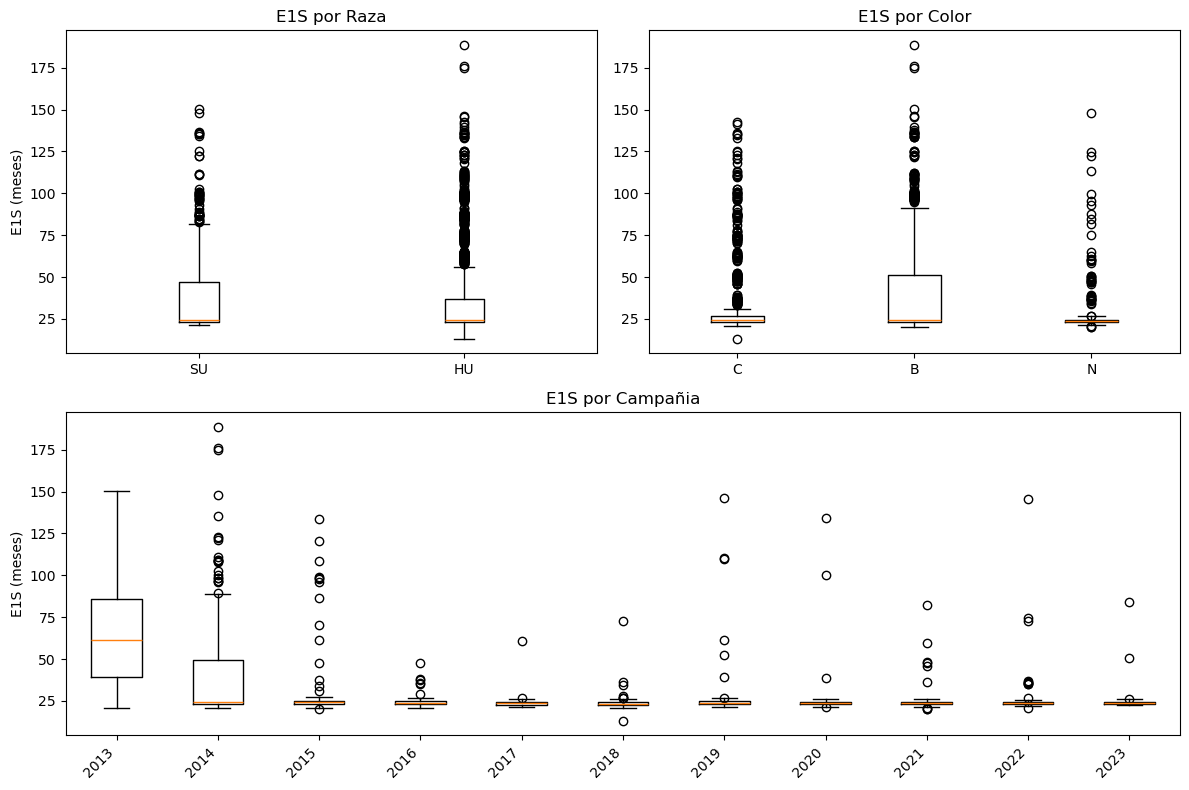

In [33]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig= plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])       
ax2 = fig.add_subplot(gs[0, 1])       
ax3 = fig.add_subplot(gs[1, :], sharey=ax1)  

#Raza--Breed
razas=E1S['RAZA'].unique()
d_raza=[E1S[E1S['RAZA']==r]['E1S'].dropna() for r in razas]

#Color--Color
color=E1S['COLOR_3'].unique()
d_color=[E1S[E1S['COLOR_3']==c]['E1S'].dropna() for c in color]

#Campaña--Capaign
E1S['CAMPANIA']=E1S['CAMPANIA'].astype(str)
camp = sorted(E1S['CAMPANIA'].unique())
d_camp=[E1S[E1S['CAMPANIA']==t]['E1S'].dropna() for t in camp]


# RAZA---Breed
ax1.boxplot(d_raza, labels=razas)
ax1.set_title('E1S por Raza')
ax1.set_ylabel('E1S (meses)')

# COLOR---Color
ax2.boxplot(d_color, labels=color)
ax2.set_title('E1S por Color')

#CAMPAÑA--Campaign
ax3.boxplot(d_camp,labels=camp)
ax3.set_title('E1S por Campañia')
ax3.set_ylabel('E1S (meses)')
ax3.set_xticklabels(camp, rotation=45, ha='right') 


plt.tight_layout()
plt.show()

E1S (meses):
La Edad al primer servicio tiende a estabilizarse entre los 24-25 meses. Después de la campaña 2014, hubo un cambio importante que redujo la variabilidad de la E1S.
Existe un alto número de valores atípicos, promedio (36.94) y desviación estándar (25.61), lo cual representa un sesgo significativo. En este caso, es mejor fiarnos de la mediana.

- Raza: la mediana es consistente en ambos (cerca a los 25 meses). Los Huacaya presenata una mayor dispersión y valores atípicos que duplican a los Suri.
- Color: Las alpacas blancas tienen mayor variabilidad. Las alpacas de los demás colores son más consistentes (alrededor de 25 meses). 
- Campaña: El punto de inflexión es en el 2014, a partir del cual, se observa una tendendecia a la baja en la mediana y la dispersión. Desde el 2014 hasta 2023 se ha estabilizado en  24 meses, lo que sugiere un criterio un criterio de selección y manejo reproductivo más estricto y eficiente.

E1S(months):
The age at first service shows a stabilization trend between 24-25 months. There was a significant change at 2014 which reduced E1S variability.
Due to the high number of outliers, the average (36.94) and standard deviation (25.61) are skewed.Therefore, is better to consider the median instead. 

- Breed: the median is consistent across both breeds (~25 months). Huacaya presents greater dispersion and twice the numeber of outliers comparred to Suri.
- Color: White alpacas exhibit higher variability, whereas alpacas of other colors are more consistent (25 months aprox).
- Campaign: The inflection point was in 2014, from which E1S has almost completely stabilized at 24 months. This suggests the implementation of much stricter and more efficient selection and reproductive management criteria.
                                                                                                       


In [35]:
#Prueba de Levene (homogeneidad de varianzas) | Levene's Test (Homogeneity of Variances)

#Hipótesis nula: las varianzas de E1S son iguales entre grupos. | Null Hypothesis (H0): E1S variances are equal across groups.

from scipy.stats import levene

# Color
grupos_color = [g['E1S'].values for _, g in E1S.groupby('COLOR_3')]
stat_levene_color, p_levene_color = levene(*grupos_color)

if p_levene_color >= 0.05:
    decision = "no se rechaza la homogeneidad de varianzas"
else:
    decision = "se rechaza la homogeneidad de varianzas"
    
print(f"Color: stat = {stat_levene_color} , p ={p_levene_color}, entonces {decision}")

##  RAZA---Breed
grupos_raza = [g['E1S'].values for _, g in E1S.groupby('RAZA')]
stat_levene_raza, p_levene_raza = levene(*grupos_raza)

if p_levene_raza >= 0.05:
    decision = "no se rechaza la homogeneidad de varianzas"
else:
    decision = "se rechaza la homogeneidad de varianzas"
    
print(f"Raza: stat = {stat_levene_raza} , p ={p_levene_raza}, entonces {decision}")

#  Campañia--Campaign
grupos_campania = [g['E1S'].values for _, g in E1S.groupby('CAMPANIA')]
stat_levene_campania, p_levene_campania = levene(*grupos_campania)

if p_levene_campania >= 0.05:
    decision = "no se rechaza la homogeneidad de varianzas"
else:
    decision = "se rechaza la homogeneidad de varianzas"
    
print(f"Campania: stat = {stat_levene_campania} , p ={p_levene_campania}, entonces {decision}")

Color: stat = 39.29781599033913 , p =1.597634083869128e-17, entonces se rechaza la homogeneidad de varianzas
Raza: stat = 1.3831285838143783 , p =0.23968415629123654, entonces no se rechaza la homogeneidad de varianzas
Campania: stat = 97.99283065896384 , p =1.3308073518950272e-170, entonces se rechaza la homogeneidad de varianzas


Al no cumplirse el supuesto de homogeneidad de varianzas, 
se utilizó la prueba no paramétrica de Kruskal‑Wallis para evaluar las diferencias de la edad al primer servicio (E1S) 
entre los niveles de color, raza y campaña.
    
Since the assumption of homogeneity of variances (homoscedasticity) was not met, the non-parametric Kruskal-Wallis test was used to evaluate the differences in age at first service (E1S) among the levels of color, breed, and campaign.

In [37]:
from scipy.stats import kruskal

# Kruskal Wallis
grupos = [g['E1S'].values for _, g in E1S.groupby('COLOR_3')]
stat_kw, p_kw = kruskal(*grupos)

# Color
print(f"Kruskal-Wallis COLOR_3: H = {stat_kw:.3f}, p = {p_kw:.4f}")
if p_kw < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de COLOR")
    print("Reject H0: there are significant differences between at least two COLOR groups")
else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de COLOR.")
    print("Fail to reject H0: No significance differences between COLOR groups.")
print('\n')

#  Raza---Breed
grupos_raza = [g['E1S'].values for _, g in E1S.groupby('RAZA')]
stat_kw_raza, p_kw_raza = kruskal(*grupos_raza)
print(f"Kruskal-Wallis raza: H = {stat_kw_raza:.3f}, p = {p_kw_raza:.4f}")
if p_kw_raza < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de RAZA.")
    print("Reject H0: there are significant difference between at least two BREED groups")

else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de RAZA.")
    print("Fail to reject H0: No significant difference between BREED groups.")

print('\n')

#  Campañia--Campaign
grupos_camp = [g['E1S'].values for _, g in E1S.groupby('CAMPANIA')]
stat_kw_camp, p_kw_camp = kruskal(*grupos_camp)
print(f"Kruskal-Wallis campañia: H = {stat_kw_camp:.3f}, p = {p_kw_camp:.4f}")
if p_kw_camp < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de CAMPAÑIA.")
    print("Reject H0: there are significant difference between at least two CAMPAIGN groups")

else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de CAMPAÑIA.")
    print("Fail to reject H0: No significance difference between CAMPAIGN groups.")



Kruskal-Wallis COLOR_3: H = 63.622, p = 0.0000
Se rechaza H0: hay diferencias significativas entre al menos dos grupos de COLOR
Reject H0: there are significant differences between at least two COLOR groups


Kruskal-Wallis raza: H = 0.095, p = 0.7582
No se rechaza H0: no se detectan diferencias significativas entre los grupos de RAZA.
Fail to reject H0: No significant difference between BREED groups.


Kruskal-Wallis campañia: H = 1079.937, p = 0.0000
Se rechaza H0: hay diferencias significativas entre al menos dos grupos de CAMPAÑIA.
Reject H0: there are significant difference between at least two CAMPAIGN groups


El factor que tiene el efecto más significativo sobre la edad al primer servicio es el año de campaña, seguido por el color de las alpacas. La raza NO representa un efecto significativo.---The Campaign Year had the most statistically significant effect on the age at first service, followed by the effect of Color. The factor of Breed showed no statistically significant effect.---

### 2.2 E1P | Age at first birth

In [40]:
# Edad al primer parto considerando  color, campaña y raza. | Age at first birth (months), by color, campain and breed
E1P=parto.copy()
E1P=pd.merge(E1P,ped,left_on='ARETE_MADRE', right_on='ARETE',how='left')
E1P=pd.merge(E1P,empadre,left_on='ID_EMPADRE', right_on='ID_EMPARE',how='left')

#Consideramos desde la campaña del 2013 hasta el 2023 | Only considering campaigns from 2013 to 2023
E1P=E1P[(E1P['CAMPANIA']>=2013) & (E1P['CAMPANIA']<2024)]
E1P=E1P[['ARETE_MADRE','N_partos','F_NACIMIENTO_CRIA','F_NACIMIENTO','RAZA', 'COLOR','CAMPANIA']]

#Consideramos solos las alpacas nacidas en la empresa | Only alpacas that were born on the farm are considered.
E1P=pd.merge(E1P, cod, left_on='ARETE_MADRE', right_on='SERIE_ARETE', how='left')
E1P=E1P[E1P['ID_ENTRADA']=='NAC']
E1P=E1P[['ARETE_MADRE','N_partos','F_NACIMIENTO_CRIA','F_NACIMIENTO','RAZA', 'COLOR','CAMPANIA']]

#Calculo de la Edad al primer parto | Calculation of the age at first birth (months)
E1P['E1P']=round((E1P['F_NACIMIENTO_CRIA']-E1P['F_NACIMIENTO']).dt.days/30,2)
E1P=E1P[E1P['N_partos']==1]

#Agrupación de las alpacas por color: B=blanco, N=Negro, C= colores | Grouping the color of the alpacas in 3 subgroups: B= white, N= black, C=colors
group_color=['B','N']
E1P['COLOR_3']=np.where(E1P['COLOR'].isin (group_color), E1P['COLOR'], 'C')

E1P['CAMPANIA']=E1P['CAMPANIA'].astype('object')


E1P.head()


,ARETE_MADRE,N_partos,F_NACIMIENTO_CRIA,F_NACIMIENTO,RAZA,COLOR,CAMPANIA,E1P,COLOR_3
0,001-13,1,2016-02-22,2012-08-22,SU,LFXO,2015,42.63,C
3,002-16,1,2018-12-19,2015-11-04,SU,B,2018,38.03,B
5,002-18,1,2020-12-07,2017-11-30,HU,B,2020,36.77,B
8,003-15,1,2018-01-12,2014-10-26,HU,B,2017,39.13,B
12,003-16,1,2019-01-08,2015-11-04,HU,N,2018,38.70,N


In [41]:
# Tabla resumen
print(f'La edad al primer parto (meses) es en promedio {round(E1P['E1P'].mean(),2)} +- {round(E1P['E1P'].std(),2)}')

tabla_raza = (E1P.groupby('RAZA')['E1P'].agg(n='count', media='mean', desv_std='std').reset_index())
tabla_raza['media'] = tabla_raza['media'].round(1)
tabla_raza['desv_std'] = tabla_raza['desv_std'].round(2)

tabla_color=(E1P.groupby('COLOR_3')['E1P'].agg(n='count',media='mean',desv_std='std').reset_index())
tabla_color['media']=tabla_color['media'].round(1)
tabla_color['desv_std']=tabla_color['desv_std'].round(2)

tabla_campania=(E1P.groupby('CAMPANIA')['E1P'].agg(n='count',media='mean',desv_std='std').reset_index())
tabla_campania['media']=tabla_campania['media'].round(1)
tabla_campania['desv_std']=tabla_campania['desv_std'].round(2)

tabla_raza['FACTOR'] = 'RAZA'
tabla_color['FACTOR'] = 'COLOR_3'
tabla_campania['FACTOR'] = 'CAMPANIA'

tabla_raza = tabla_raza.rename(columns={'RAZA':'NIVEL'})
tabla_color = tabla_color.rename(columns={'COLOR_3':'NIVEL'})
tabla_campania = tabla_campania.rename(columns={'CAMPANIA':'NIVEL'})

tabla_E1P = pd.concat([tabla_raza,tabla_color, tabla_campania],ignore_index=True)
tabla_E1P=tabla_E1P[['FACTOR','NIVEL','n','media','desv_std']]
tabla_E1P

La edad al primer parto (meses) es en promedio 39.57 +- 7.49


,FACTOR,NIVEL,n,media,desv_std
0,RAZA,HU,1262,39.4,7.36
1,RAZA,SU,260,40.5,8.01
2,COLOR_3,B,752,40.1,8.02
3,COLOR_3,C,510,39.6,7.16
4,COLOR_3,N,260,37.9,6.22
5,CAMPANIA,2013,68,45.8,10.38
6,CAMPANIA,2014,76,40.5,8.45
7,CAMPANIA,2015,172,42.5,9.81
8,CAMPANIA,2016,119,42.2,10.47
9,CAMPANIA,2017,61,42.5,9.43


C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\3000092038.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(d_raza, labels=razas)
C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\3000092038.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(d_color, labels=color)
C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\3000092038.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(d_camp,labels=camp)


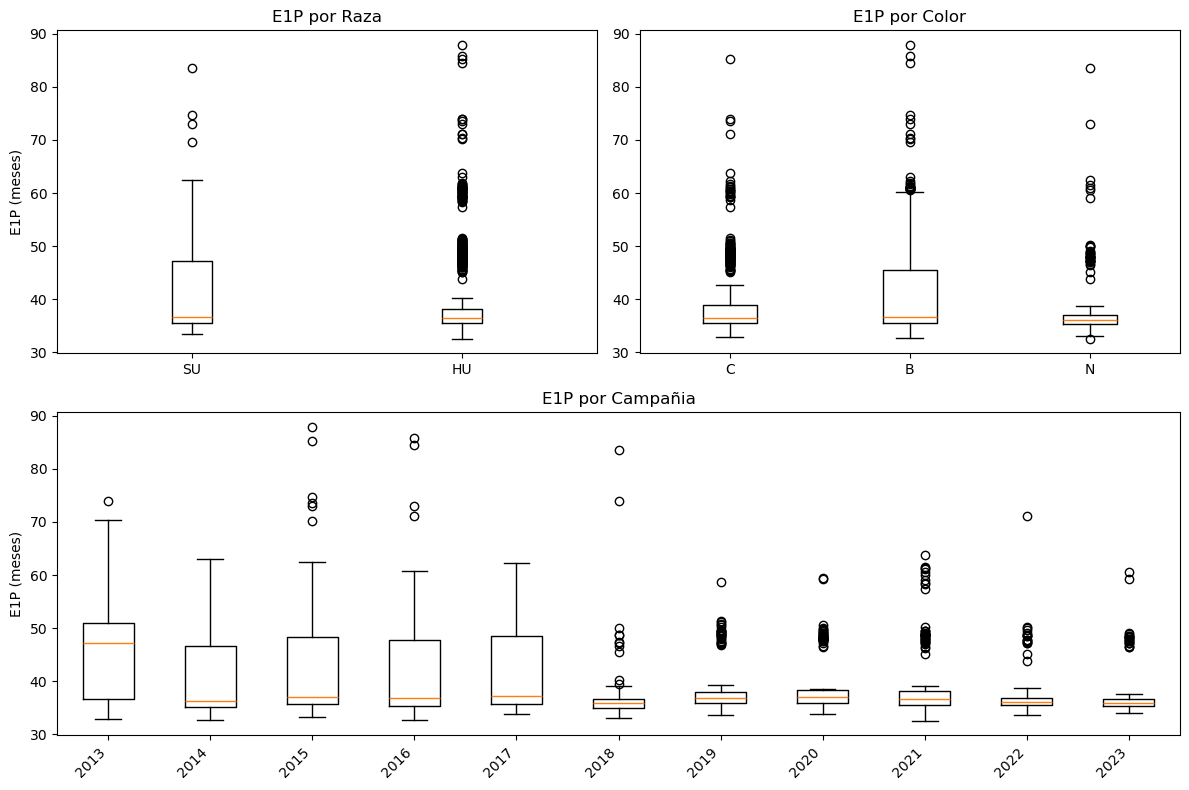

In [42]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig= plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])       
ax2 = fig.add_subplot(gs[0, 1])       
ax3 = fig.add_subplot(gs[1, :], sharey=ax1)  

#Raza--Breed
razas=E1P['RAZA'].unique()
d_raza=[E1P[E1P['RAZA']==r]['E1P'].dropna() for r in razas]

#Color--Color
color=E1P['COLOR_3'].unique()
d_color=[E1P[E1P['COLOR_3']==c]['E1P'].dropna() for c in color]

#Campain--Campaña
E1P['CAMPANIA']=E1P['CAMPANIA'].astype(str)
camp = sorted(E1P['CAMPANIA'].unique())
d_camp=[E1P[E1P['CAMPANIA']==t]['E1P'].dropna() for t in camp]


# RAZA---Breed
ax1.boxplot(d_raza, labels=razas)
ax1.set_title('E1P por Raza')
ax1.set_ylabel('E1P (meses)')

# COLOR---Color
ax2.boxplot(d_color, labels=color)
ax2.set_title('E1P por Color')

#CAMPAÑA--Campain
ax3.boxplot(d_camp,labels=camp)
ax3.set_title('E1P por Campañia')
ax3.set_ylabel('E1P (meses)')
ax3.set_xticklabels(camp, rotation=45, ha='right') 


plt.tight_layout()
plt.show()

E1P (meses):
La Edad al primer parto tiende a estabilizarse entre los 35.5-36 meses. Existe una clara mejora en la eficiencia reproductiva a partir de 2018, logrando que la mayoría de las alpacas tengan su primer parto a los 3 años.
Debido al alto número de valores atípicos, el promedio (39.57) y la desviación estándar (7.49), presentan un sesgo significativo. En este caso, es mejor fiarnos de la mediana.

- Raza: Las medianas son muy similares, cerca de 36-37 meses. Suri presenta una mayor variabilidad en su rango intercuartil. Los Huacaya presenta mayor cantidad de outliers, lo que sugiere que hay un grupo retrasa su primer parto.
- Color: Presenta un comportamiento similar que la E1S. Las alpacas blancas tienen mayor variabilidad, mientra que las demás son más consistentes (alrededor de 36 meses). 
- Campaña: Desde el 2013 al 2017 se observa una alta variabilidad y medianas fluctuantes. El punto de inflexión fue el 2018. Esto tiene coherencia biológica, ya que si el primer servicio (E1S) se estabilizó en 24 meses y la gestación dura aproximadamente 11.5 meses, el primer parto debería ocurrir alrededor de los 35.5 - 36 meses.

E1P(months):
The age at first birth tends to stabilize between 35.5-36 months. There has been a clearly improvement in reproductive efficiency  since 2018 campaing, resulting in most alpacas having their first birth at 3 years old.
Due to the  high volume of oultiers, the average (39.57) and standard deviation (7.49) are skewed.Therefore, is better to rely on the median instead.

- Breed: The medians are similiar across breeds (~36-37 months). Suri presents higher variability. Huacayas show a larger number of oultiers,suggesting a tendency in a subgroup of breed to delay their first birth. 
- Color: This follows a similar pattern to E1S. White alpacas exhibit more variability, whereas other colors are more consistent (~36 months).
- Campaigns: From 2013 to 2017, the data shows high variability and fluctuants medians. The inflection point was in 2018. Since then, the E1P has stabilized around 36 months (3 years). This makes biological sense, because the age of first service is stabilized at 24 months and  gestation lasts 11.5 monhs, the first birth must occured around 35.5 - 36 months.

In [44]:
#Prueba de Levene (homogeneidad de varianzas) | Levene's Test (Homogeneity of Variances)

#Hipótesis nula: las varianzas de E1P son iguales entre grupos. | Null Hypothesis (H0): E1P variances are equal across groups.

from scipy.stats import levene

# COLOR
grupos_color_E1P = [g['E1P'].values for _, g in E1P.groupby('COLOR_3')]
stat_levene_color_E1P, p_levene_color_E1P = levene(*grupos_color_E1P)

if p_levene_color_E1P >= 0.05:
    decision = "no se rechaza la homogeneidad de varianzas"
else:
    decision = "se rechaza la homogeneidad de varianzas"
    
print(f"Color: stat = {stat_levene_color_E1P} , p ={p_levene_color_E1P}, entonces {decision}")

# RAZA--BREED
grupos_raza_E1P = [g['E1P'].values for _, g in E1P.groupby('RAZA')]
stat_levene_raza_E1P, p_levene_raza_E1P = levene(*grupos_raza_E1P)

if p_levene_raza_E1P >= 0.05:
    decision = "no se rechaza la homogeneidad de varianzas"
else:
    decision = "se rechaza la homogeneidad de varianzas"
    
print(f"Raza: stat = {stat_levene_raza_E1P} , p ={p_levene_raza_E1P}, entonces {decision}")

# CAMPAÑAS---CAMPAIGNS
grupos_campania_E1P = [g['E1P'].values for _, g in E1P.groupby('CAMPANIA')]
stat_levene_campania_E1P, p_levene_campania_E1P = levene(*grupos_campania_E1P)

if p_levene_campania_E1P >= 0.05:
    decision = "no se rechaza la homogeneidad de varianzas"
else:
    decision = "se rechaza la homogeneidad de varianzas"
    
print(f"Campania: stat = {stat_levene_campania_E1P} , p={p_levene_campania_E1P}, entonces {decision}")



Color: stat = 7.305188102165901 , p =0.0006959173935155666, entonces se rechaza la homogeneidad de varianzas
Raza: stat = 4.5889291080994115 , p =0.03233760129986515, entonces se rechaza la homogeneidad de varianzas
Campania: stat = 17.566594389042873 , p=1.389656531702966e-30, entonces se rechaza la homogeneidad de varianzas


Al no cumplirse el supuesto de homogeneidad de varianzas, 
se utilizó la prueba no paramétrica de Kruskal‑Wallis para evaluar las diferencias de la edad al primer servicio (E1P) 
entre los niveles de color, raza y campaña.---Since the assumption of homogeneity of variances (homoscedasticity) was not met, the non-parametric Kruskal-Wallis test was used to evaluate the differences in age at first service (E1P) among the levels of color, breed, and campaign.---

In [46]:
from scipy.stats import kruskal

# Kruskal Wallis

#Color
grupos_E1P = [g['E1P'].values for _, g in E1P.groupby('COLOR_3')]
stat_kw_E1P, p_kw_E1P = kruskal(*grupos_E1P)
print(f"Kruskal-Wallis COLOR_3: H = {stat_kw_E1P:.3f}, p = {p_kw_E1P:.4f}")
if p_kw_E1P < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de COLOR.")
    print("Reject H0: there are significant difference between at least two COLOR groups")

else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de COLOR.")
    print("Fail to reject H0: No significant difference between COLOR groups.")
print('\n')

# Raza --- Breed
grupos_raza_E1P = [g['E1P'].values for _, g in E1P.groupby('RAZA')]
stat_kw_raza_E1P, p_kw_raza_E1P = kruskal(*grupos_raza_E1P)
print(f"Kruskal-Wallis raza: H = {stat_kw_raza_E1P:.3f}, p = {p_kw_raza_E1P:.4f}")
if p_kw_raza_E1P < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de raza.")
    print("Reject H0: there are significant difference between at least two BREED groups")

else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de raza.")
    print("Fail to reject H0: No significant difference between BREED groups.")
print('\n')


# Campañia --- Campaigns
grupos_camp_E1P = [g['E1P'].values for _, g in E1P.groupby('CAMPANIA')]
stat_kw_camp_E1P, p_kw_camp_E1P = kruskal(*grupos_camp_E1P)
print(f"Kruskal-Wallis campañia: H = {stat_kw_camp_E1P:.3f}, p = {p_kw_camp_E1P:.4f}")
if p_kw_camp_E1P < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de campañia.")
    print("Reject H0: there are significant difference between at least two CAMPAIGN groups")

else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de campañia.")
    print("Fail to reject H0: No significance difference between CAMPAIGN groups.")






Kruskal-Wallis COLOR_3: H = 23.162, p = 0.0000
Se rechaza H0: hay diferencias significativas entre al menos dos grupos de COLOR.
Reject H0: there are significant difference between at least two COLOR groups


Kruskal-Wallis raza: H = 3.020, p = 0.0822
No se rechaza H0: no se detectan diferencias significativas entre los grupos de raza.
Fail to reject H0: No significant difference between BREED groups.


Kruskal-Wallis campañia: H = 126.131, p = 0.0000
Se rechaza H0: hay diferencias significativas entre al menos dos grupos de campañia.
Reject H0: there are significant difference between at least two CAMPAIGN groups


El factor que tiene el efecto más significativo sobre la edad al primer parto es el año de campaña, seguido por el color de las alpacas. La raza NO representa un efecto significativo.
---The Campaign Year had the most statistically significant effect on the age at first birth, followed by the effect of Color. The factor of Breed showed no statistically significant effect.---

## Comparación entre Edad a primer servicio vs Edad a primer parto
Al contrastar ambos indicadores, podemos concluir que la Campaña influye con mayor intensidad en la E1S que en la E1P.E1S: El valor masivo de $H = 1079.94$ demuestra que el cambio en las decisiones de manejo técnico (cuándo dar servicio a la alpaca) fue drástico y altamente efectivo para estandarizar el rebaño.E1P: Aunque la campaña también es significativa ($H = 126.13$), su impacto es menor. Esto se debe a que el parto depende no solo del manejo humano, sino también de factores biológicos naturales (éxito de la concepción y duración de la gestación) que introducen una variabilidad propia que el técnico no puede controlar totalmente.

## Comparison between Age at first sevice vs Age at first birth
When comparing both indicators, we can conclude that the Campaign has a much stronger influence on E1S than on E1P.E1S: The massive $H = 1079.94$ value proves that the shift in technical management decisions (when to provide service to the alpaca) was drastic and highly effective in standardizing the herd.E1P: While the campaign is also significant ($H = 126.13$), its impact is lower. This occurs because birth depends not only on human management but also on natural biological factors (conception success and gestation length), which introduce inherent variability that cannot be fully controlled by technical intervention.<br clear="left">


### 2.3 TASA PREÑEZ | Pregnancy rate

In [50]:
#Tasa de preñez= # hembras preñadas / # hembras empadradas | Pregnancy rate= # pregnant females / # mated females


t_prenez=diagnostico.copy()
t_prenez=pd.merge(t_prenez, ped, left_on='ARETE_HEMBRA', right_on='ARETE', how='left')
t_prenez=t_prenez[['ARETE_HEMBRA','RAZA', 'COLOR','ID_EMPARE', 'ID_TYPE_TEST', 'DIAGNOSE']]

#Consideramos desde la campaña del 2013 hasta el 2023 | Only considering campaigns from 2013 to 2023
t_prenez=pd.merge(t_prenez, empadre, left_on='ID_EMPARE', right_on='ID_EMPARE', how='left')
t_prenez=t_prenez[(t_prenez['CAMPANIA']>=2013) & (t_prenez['CAMPANIA']<2024)]
t_prenez=t_prenez.rename(columns={'ARETE_HEMBRA_x':'ARETE_HEMBRA'})


t_prenez=pd.merge(t_prenez, parto, left_on='ID_EMPARE', right_on='ID_EMPADRE', how='left')
t_prenez=t_prenez[['ARETE_HEMBRA','RAZA', 'COLOR','CAMPANIA','N_partos','FECHA_EMPARE','ID_EMPARE', 'ID_TYPE_TEST', 'DIAGNOSE']]
t_prenez=t_prenez.sort_values(['ARETE_HEMBRA', 'FECHA_EMPARE'])
t_prenez = t_prenez.drop_duplicates(subset=['ARETE_HEMBRA', 'N_partos','ID_EMPARE','ID_TYPE_TEST','DIAGNOSE'], keep='first')

# Hembra preñada= algún diagnóstico con ecografía de positivo | pregnant females = any female with a positive ultrasound diagnosis
conditions_prenez=(t_prenez['ID_TYPE_TEST']=='EC')& (t_prenez['DIAGNOSE']=='P')
t_prenez = t_prenez.sort_values(['ARETE_HEMBRA', 'ID_EMPARE', 'FECHA_EMPARE'])
t_prenez['prenez_bool']=conditions_prenez
t_prenez['prenez'] = t_prenez.groupby('ID_EMPARE')['prenez_bool'].transform(lambda x: x & ~x.cumsum().astype(bool).shift(fill_value=False)).astype(int)

# hembras empadradas= hembras que fueron diagnosticadas por ecografía | mated females = any females that underwent ultrasound diagnosis( exposed breeding)
conditions_empadre=(t_prenez['ID_TYPE_TEST']=='EC')
t_prenez = t_prenez.sort_values(['ARETE_HEMBRA', 'ID_EMPARE', 'FECHA_EMPARE'])
t_prenez['empadre_bool']=conditions_empadre
t_prenez['empadre'] = t_prenez.groupby('ID_EMPARE')['empadre_bool'].transform(lambda x: x & ~x.cumsum().astype(bool).shift(fill_value=False)).astype(int)


#Agrupación de las alpacas por color: B=blanco, N=Negro, C= colores | Grouping the color of the alpacas in 3 subgroups: B= white, N= black, C=colors
group_color=['B','N']
t_prenez['COLOR_3']=np.where(t_prenez['COLOR'].isin (group_color), t_prenez['COLOR'], 'C')

t_prenez['CAMPANIA']=t_prenez['CAMPANIA'].astype('object')

t_prenez.head(20)

,ARETE_HEMBRA,RAZA,COLOR,CAMPANIA,N_partos,FECHA_EMPARE,ID_EMPARE,ID_TYPE_TEST,DIAGNOSE,prenez_bool,prenez,empadre_bool,empadre,COLOR_3
1039,001-05,SU,COM,2013,NaN,2013-03-17,M00019031,MA,P,False,0,False,0,C
1556,001-05,SU,COM,2013,NaN,2013-03-17,M00019031,EC,P,True,1,True,1,C
1950,001-05,SU,COM,2013,NaN,2013-03-17,M00019031,EC,V,False,0,True,0,C
72,001-09,HU,CC,2013,NaN,2012-12-19,M00018279,MA,V,False,0,False,0,C
173,001-09,HU,CC,2013,NaN,2013-01-03,M00018379,MA,V,False,0,False,0,C
360,001-09,HU,CC,2013,NaN,2013-01-19,M00018511,MA,V,False,0,False,0,C
887,001-09,HU,CC,2013,NaN,2013-02-05,M00018670,MA,P,False,0,False,0,C
753,001-09,HU,CC,2013,NaN,2013-02-11,M00018713,MA,P,False,0,False,0,C
889,001-09,HU,CC,2013,NaN,2013-02-11,M00018713,EC,V,False,0,True,1,C
3128,001-09,HU,CC,2014,NaN,2014-01-23,M00019936,MA,V,False,0,False,0,C


In [51]:
# Tabla resumen | Summary table
print(f"La tasa de preñez es en promedio {round(t_prenez['prenez'].sum()/t_prenez['empadre'].sum()*100,2)}%")

tp_raza = (t_prenez.groupby(['RAZA'], as_index=False).agg(
        hembras_empadradas = ('empadre', 'sum'),
        hembras_preñadas   = ('prenez', 'sum')))
tp_raza['T_PRENEZ'] = (tp_raza['hembras_preñadas'] / tp_raza['hembras_empadradas'] * 100).round(1)

tp_color = (t_prenez.groupby(['COLOR_3'], as_index=False).agg(
        hembras_empadradas = ('empadre', 'sum'),
        hembras_preñadas   = ('prenez', 'sum')))
tp_color['T_PRENEZ'] = (tp_color['hembras_preñadas'] / tp_color['hembras_empadradas'] * 100).round(1)

tp_campania = (t_prenez.groupby(['CAMPANIA'], as_index=False).agg(
        hembras_empadradas = ('empadre', 'sum'),
        hembras_preñadas   = ('prenez', 'sum')))
tp_campania['T_PRENEZ'] = (tp_campania['hembras_preñadas'] / tp_campania['hembras_empadradas'] * 100).round(1)

tp_raza['FACTOR'] = 'RAZA'
tp_color['FACTOR'] = 'COLOR_3'
tp_campania['FACTOR'] = 'CAMPANIA'

tp_raza = tp_raza.rename(columns={'RAZA':'NIVEL'})
tp_color = tp_color.rename(columns={'COLOR_3':'NIVEL'})
tp_campania = tp_campania.rename(columns={'CAMPANIA':'NIVEL'})

tabla_tprenez = pd.concat([tp_raza,tp_color, tp_campania],ignore_index=True)
tabla_tprenez=tabla_tprenez[['FACTOR','NIVEL','hembras_empadradas', 'hembras_preñadas', 'T_PRENEZ']]
tabla_tprenez



La tasa de preñez es en promedio 79.31%


,FACTOR,NIVEL,hembras_empadradas,hembras_preñadas,T_PRENEZ
0,RAZA,HU,10277,8171,79.5
1,RAZA,SU,2039,1597,78.3
2,COLOR_3,B,6204,4806,77.5
3,COLOR_3,C,3397,2717,80.0
4,COLOR_3,N,2715,2245,82.7
5,CAMPANIA,2013,887,638,71.9
6,CAMPANIA,2014,914,671,73.4
7,CAMPANIA,2015,1045,795,76.1
8,CAMPANIA,2016,1073,854,79.6
9,CAMPANIA,2017,917,727,79.3


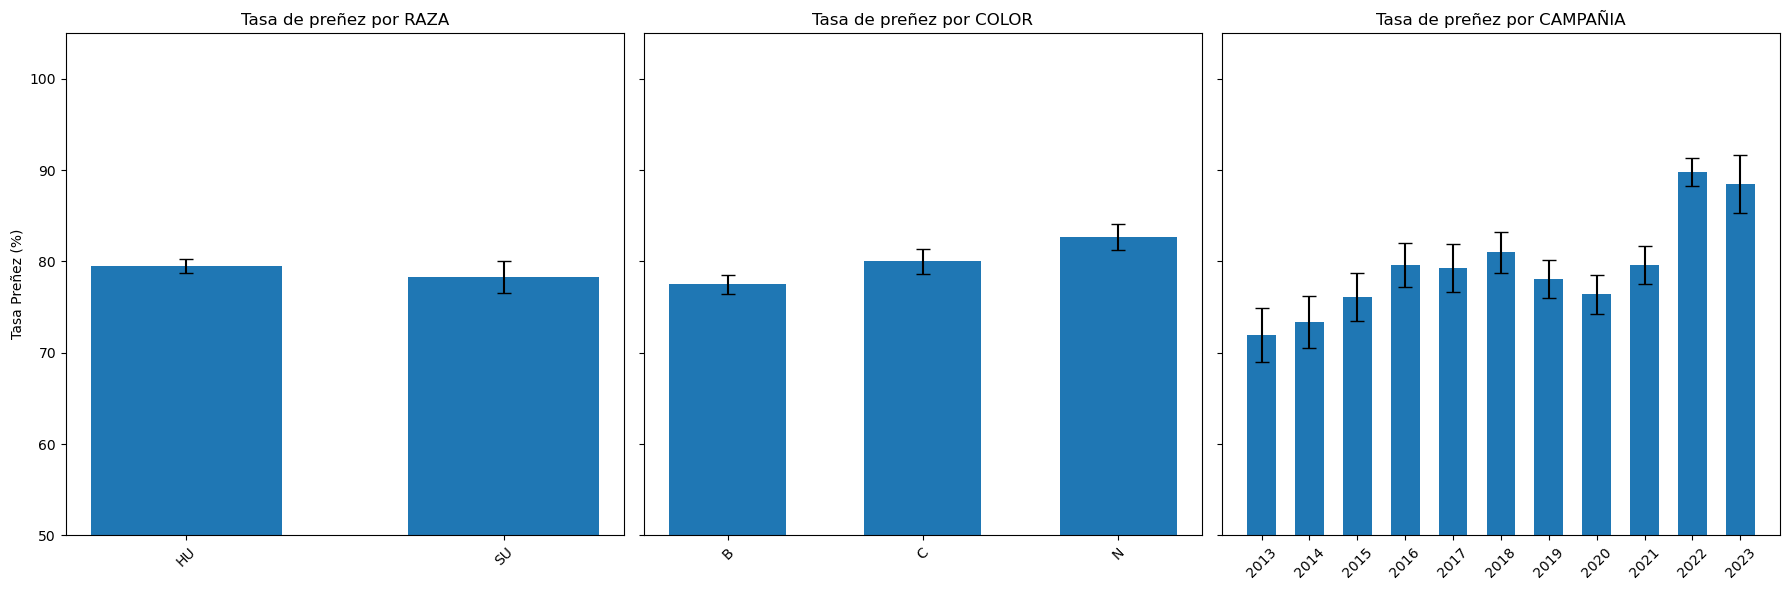

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, factor in enumerate(['RAZA', 'COLOR_3', 'CAMPANIA']):
    data = tabla_tprenez[tabla_tprenez['FACTOR']==factor]
    axes[i].bar(range(len(data)), 
                data['T_PRENEZ'], 
                 width=0.6,
                yerr=1.96*np.sqrt(data['T_PRENEZ']*(100-data['T_PRENEZ'])/data['hembras_empadradas']), # IC 95%
                capsize=5)
    axes[i].set_xticks(range(len(data)))
    axes[i].set_xticklabels(data['NIVEL'], rotation=45)
    axes[0].set_ylabel('Tasa Preñez (%)')
    axes[i].set_ylim(50, 105) 
    axes[0].set_title('Tasa de preñez por RAZA')
    axes[1].set_title('Tasa de preñez por COLOR')
    axes[2].set_title('Tasa de preñez por CAMPAÑIA')


plt.tight_layout()
plt.show()


La tasa de preñez es en promedio 77.78%.

- Raza: La tasa de preñez en ambas razas es muy similar. Los intervalos de confianza se solapan casi por completo, lo que refuerza la conclusión de que la raza no es un factor determinante en el éxito reproductivo.
- Color: Las alpacas de color negro tienen una tasa de preñez más alta (~82%), seguidas por las de colores (~78%) y finalmente las blancas (~76%). El intervalo de confianza de las alpacas negras es más elevado y no se solapa con el de las blancas, sugiriendo una diferencia estadística real.
- Campaña: Se observa un crecimiento sostenido desde 2013 hasta 2023, alcanzando picos de hasta el 89%. Además, los intervalos de confianza se han vuelto más cortos con el paso de los años, lo que indica que el manejo técnico se ha vuelto más consistente y predecible.


The average pregnancy rate is 77.78%.
- Breed: Across both breeds, the pregnancy rate is very similar. The confidence intervals overlap almost entirely, supporting the conclusion that breed is not a significant factor.
- Color: The rate for Black/Other (N) alpacas is noticeably higher (~82%) and its interval does not overlap with the White (B) group. This suggests that the higher pregnancy rate in the "N" group is statistically significant and not due to chance.
- Campaigns: There is sustained growth from 2013 to 2023, reaching peaks of up to 89%. As the years progress, the confidence intervals become shorter, indicating that management has become more consistent and predictable over time.

In [54]:
# Logit Rregression
import statsmodels.formula.api as smf
df=t_prenez[t_prenez['empadre'] == 1].copy()
df['RAZA'] = df['RAZA'].astype('category')
df['COLOR_3'] = df['COLOR_3'].astype('category')
df['CAMPANIA'] = df['CAMPANIA'].astype('category')

modelo = smf.logit("prenez ~ C(RAZA) + C(COLOR_3) + C(CAMPANIA)", data=df).fit(maxiter=200, method='lbfgs')
print(modelo.summary())


                           Logit Regression Results                           
Dep. Variable:                 prenez   No. Observations:                12316
Model:                          Logit   Df Residuals:                    12302
Method:                           MLE   Df Model:                           13
Date:                Fri, 19 Dec 2025   Pseudo R-squ.:                 0.01854
Time:                        16:42:32   Log-Likelihood:                -6401.8
converged:                       True   LL-Null:                       -6522.7
Covariance Type:            nonrobust   LLR p-value:                 3.036e-44
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7108      0.075      9.467      0.000       0.564       0.858
C(RAZA)[T.SU]          -0.0329      0.059     -0.558      0.577      -0.148       0.082
C(COLOR_3)[T.C] 

In [55]:
from IPython.display import display, Markdown

raza_p = modelo.pvalues['C(RAZA)[T.SU]']
color_n_p = modelo.pvalues['C(COLOR_3)[T.N]']
color_c_p = modelo.pvalues['C(COLOR_3)[T.C]']
color_n_coef=modelo.params['C(COLOR_3)[T.N]']
cap_2022_coef = modelo.params['C(CAMPANIA)[T.2022]']
cap_2023_coef = modelo.params['C(CAMPANIA)[T.2023]']
cap_2023_p = modelo.pvalues['C(CAMPANIA)[T.2023]']


texto_conclusion = f"""
### Modelo de Regresión Logística de Tasa de preñez:

* **Raza: No es significativa** (p = {raza_p:.3f})  Ser de raza Suri o Huacaya no cambia las probabilidades de preñez, lo que confirma que el manejo es equitativo.
* **Color: Es un factor significativo.** Tanto el color Negro (p = {color_n_p:.3f}) como los demás colores (p = {color_c_p:.3f}) tienen una probabilidad de preñez significativamente mayor que las blancas (el grupo de referencia). Especialmente el color negro muestra el impacto más fuerte {color_n_coef:.3f}
* **Campaña: Es el factor más determinante**  (p < 0.001) A partir de 2015, todas las campañas muestran una mejora significativa respecto a 2013. Los coeficientes más altos se encuentran en 2022 (coef= {cap_2022_coef:.4f}) y 2023 (coef = {cap_2023_coef:.4f}), validando el éxito de la gestión técnica reciente.


### Pregnancy Rate Logistic Regression Model:
* **Breed: Not significant** (p = {raza_p:.3f}). Being of the Suri or Huacaya breed does not change the odds of pregnancy, which confirms that management is equitable across breeds.
* **Color: A significant factor.** Both the Black color (p = {color_n_p:.3f}) and other colors (p = {color_c_p:.3f}) have a significantly higher probability of pregnancy than white alpacas (the reference group). The black color specifically shows the strongest impact ({color_n_coef:.3f}).
* **Campaign: The most decisive factor** (p < 0.001). From 2015 onwards, every campaign shows a significant improvement compared to 2013. The highest coefficients are found in 2022 (coef = {cap_2022_coef:.4f}) and 2023 (coef = {cap_2023_coef:.4f}), validating the success of recent technical management.
"""

display(Markdown(texto_conclusion))


### Modelo de Regresión Logística de Tasa de preñez:

* **Raza: No es significativa** (p = 0.577)  Ser de raza Suri o Huacaya no cambia las probabilidades de preñez, lo que confirma que el manejo es equitativo.
* **Color: Es un factor significativo.** Tanto el color Negro (p = 0.000) como los demás colores (p = 0.049) tienen una probabilidad de preñez significativamente mayor que las blancas (el grupo de referencia). Especialmente el color negro muestra el impacto más fuerte 0.239
* **Campaña: Es el factor más determinante**  (p < 0.001) A partir de 2015, todas las campañas muestran una mejora significativa respecto a 2013. Los coeficientes más altos se encuentran en 2022 (coef= 1.2863) y 2023 (coef = 1.0581), validando el éxito de la gestión técnica reciente.


### Pregnancy Rate Logistic Regression Model:
* **Breed: Not significant** (p = 0.577). Being of the Suri or Huacaya breed does not change the odds of pregnancy, which confirms that management is equitable across breeds.
* **Color: A significant factor.** Both the Black color (p = 0.000) and other colors (p = 0.049) have a significantly higher probability of pregnancy than white alpacas (the reference group). The black color specifically shows the strongest impact (0.239).
* **Campaign: The most decisive factor** (p < 0.001). From 2015 onwards, every campaign shows a significant improvement compared to 2013. The highest coefficients are found in 2022 (coef = 1.2863) and 2023 (coef = 1.0581), validating the success of recent technical management.


### 2.4 TASA PARTOS | Birth rate

In [57]:
# Tasa de partos = # hembras parieron / # hembras empadradas | Birth rate= #Birthed females / # mated females


# hembras empadradas= hembras que fueron diagnosticadas por ecografía | mated females = any females that underwent ultrasound diagnosis( exposed breeding)
t_partos=diagnostico.copy()
t_partos=t_partos[t_partos['ID_TYPE_TEST']=='EC']

#Consideramos desde la campaña del 2013 hasta el 2023 | Only considering campaigns from 2013 to 2023
t_partos=pd.merge(t_partos, empadre, left_on='ID_EMPARE', right_on='ID_EMPARE',how='left')
t_partos=t_partos[(t_partos['CAMPANIA']>=2013) & (t_partos['CAMPANIA']<=2022)]
t_partos=t_partos.rename(columns={'ARETE_HEMBRA_x':'ARETE_HEMBRA'})
t_partos=t_partos[['ARETE_HEMBRA','FECHA_EMPARE','ID_EMPARE','CAMPANIA','ID_TYPE_TEST']]
t_partos=t_partos.sort_values(['ARETE_HEMBRA','FECHA_EMPARE'])

t_partos=pd.merge(t_partos, parto, left_on='ID_EMPARE', right_on='ID_EMPADRE',how='left')
t_partos=pd.merge(t_partos, ped, left_on='ARETE_HEMBRA', right_on='ARETE',how='left')
t_partos=t_partos[['ARETE_HEMBRA','FECHA_EMPARE','CAMPANIA', 'RAZA', 'COLOR','ID_TYPE_TEST', 'N_partos','ID_EMPARE']]
t_partos=t_partos.sort_values(['ARETE_HEMBRA','FECHA_EMPARE'])

#Agrupación de las alpacas por color: B=blanco, N=Negro, C= colores | Grouping the color of the alpacas in 3 subgroups: B= white, N= black, C=colors
color_3=['B','N']
t_partos['color_3']=np.where(t_partos['COLOR'].isin(color_3),t_partos['COLOR'],'C')

t_partos.drop_duplicates(subset='ID_EMPARE', inplace=True)
t_partos.head(10)

,ARETE_HEMBRA,FECHA_EMPARE,CAMPANIA,RAZA,COLOR,ID_TYPE_TEST,N_partos,ID_EMPARE,color_3
0,001-05,2013-03-17,2013,SU,COM,EC,NaN,M00019031,C
2,001-09,2013-02-11,2013,HU,CC,EC,NaN,M00018713,C
5,001-09,2014-03-10,2014,HU,CC,EC,NaN,M00020600,C
6,001-09,2014-04-07,2014,HU,CC,EC,NaN,M00021057,C
7,001-13,2015-03-26,2015,SU,LFXO,EC,1.0,M00022599,C
9,001-13,2016-04-16,2016,SU,LFXO,EC,NaN,M00024602,C
11,001-13,2017-01-12,2017,SU,LFXO,EC,NaN,M00024938,C
12,001-13,2017-03-17,2017,SU,LFXO,EC,NaN,M00025865,C
13,001-13,2017-04-10,2017,SU,LFXO,EC,NaN,M00026115,C
15,001-13,2018-01-05,2018,SU,LFXO,EC,2.0,M00026426,C


In [58]:
# Tabla resumen
# Summary table
print(f"La tasa de partos es en promedio {round(t_partos['N_partos'].count()/t_partos['ID_EMPARE'].count()*100,2)}%")
print(f"The average rate birth is {round(t_partos['N_partos'].count()/t_partos['ID_EMPARE'].count()*100,2)}%")


La tasa de partos es en promedio 60.19%
The average rate birth is 60.19%


In [59]:
tpartos_raza = (t_partos.groupby(['RAZA'], as_index=False).agg(
        hembras_empadradas = ('ID_EMPARE', 'count'),
        hembras_paridas   = ('N_partos', 'count')))
tpartos_raza['T_PARTOS'] = (tpartos_raza['hembras_paridas'] / tpartos_raza['hembras_empadradas'] * 100).round(1)

tpartos_color = (t_partos.groupby(['color_3'], as_index=False).agg(
        hembras_empadradas = ('ID_EMPARE', 'count'),
        hembras_paridas   = ('N_partos', 'count')))
tpartos_color['T_PARTOS'] = (tpartos_color['hembras_paridas'] / tpartos_color['hembras_empadradas'] * 100).round(1)

tpartos_campania = (t_partos.groupby(['CAMPANIA'], as_index=False).agg(
        hembras_empadradas = ('ID_EMPARE', 'count'),
        hembras_paridas   = ('N_partos', 'count')))
tpartos_campania['T_PARTOS'] = (tpartos_campania['hembras_paridas'] / tpartos_campania['hembras_empadradas'] * 100).round(1)

tpartos_raza['FACTOR'] = 'RAZA'
tpartos_color['FACTOR'] = 'color_3'
tpartos_campania['FACTOR'] = 'CAMPANIA'

tpartos_raza = tpartos_raza.rename(columns={'RAZA':'NIVEL'})
tpartos_color = tpartos_color.rename(columns={'color_3':'NIVEL'})
tpartos_campania = tpartos_campania.rename(columns={'CAMPANIA':'NIVEL'})

tabla_tpartos = pd.concat([tpartos_raza,tpartos_color, tpartos_campania],ignore_index=True)
tabla_tpartos=tabla_tpartos[['FACTOR','NIVEL','hembras_empadradas', 'hembras_paridas', 'T_PARTOS']]
tabla_tpartos

,FACTOR,NIVEL,hembras_empadradas,hembras_paridas,T_PARTOS
0,RAZA,HU,9957,6050,60.8
1,RAZA,SU,1966,1126,57.3
2,color_3,B,5975,3450,57.7
3,color_3,C,3268,1997,61.1
4,color_3,N,2680,1729,64.5
5,CAMPANIA,2013,887,431,48.6
6,CAMPANIA,2014,914,334,36.5
7,CAMPANIA,2015,1045,601,57.5
8,CAMPANIA,2016,1073,661,61.6
9,CAMPANIA,2017,917,616,67.2


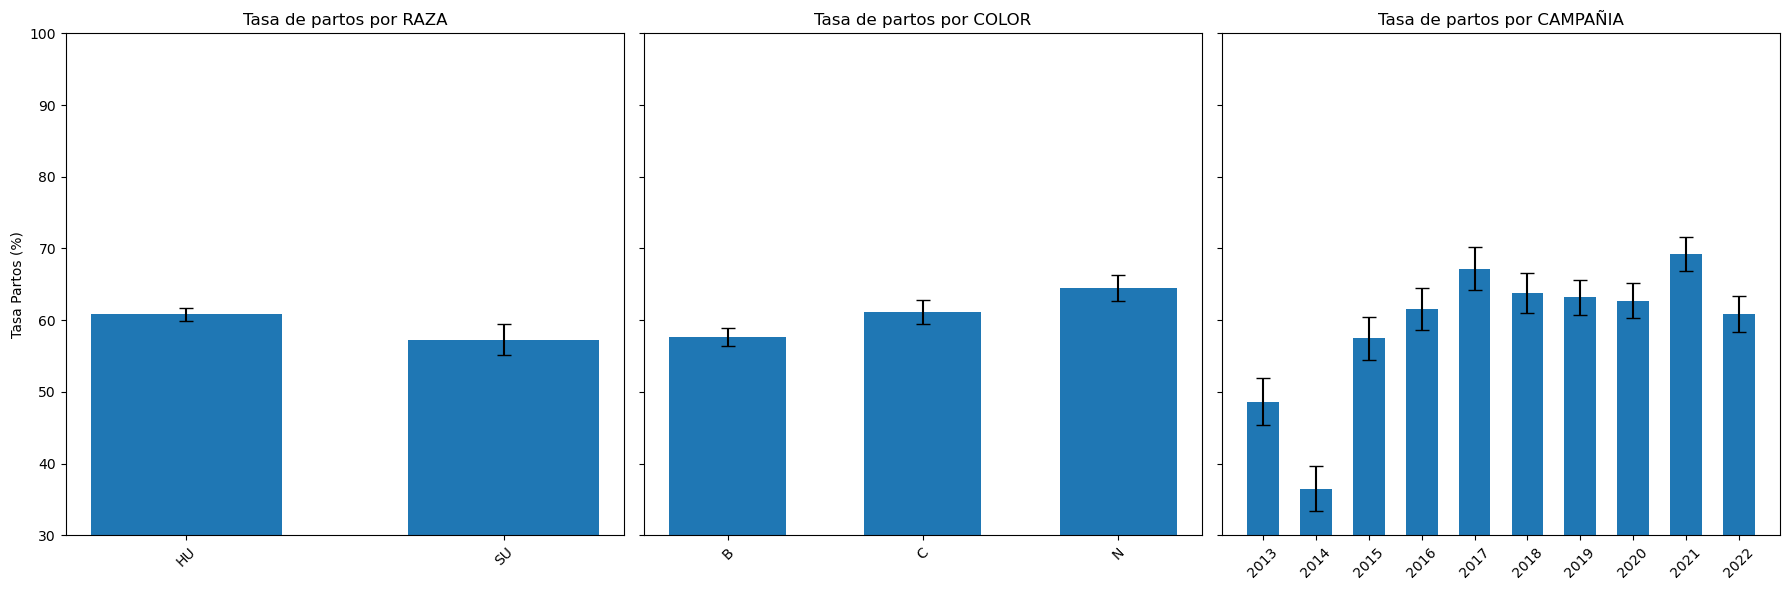

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, factor in enumerate(['RAZA', 'color_3', 'CAMPANIA']):
    data1 = tabla_tpartos[tabla_tpartos['FACTOR']==factor]
    axes[i].bar(range(len(data1)), 
                data1['T_PARTOS'], 
                 width=0.6,
                yerr=1.96*np.sqrt(data1['T_PARTOS']*(100-data1['T_PARTOS'])/data1['hembras_empadradas']), # IC 95%
                capsize=5)
    axes[i].set_xticks(range(len(data1)))
    axes[i].set_xticklabels(data1['NIVEL'], rotation=45)
    axes[0].set_ylabel('Tasa Partos (%)')
    axes[i].set_ylim(30, 100) 
    axes[0].set_title('Tasa de partos por RAZA')
    axes[1].set_title('Tasa de partos por COLOR')
    axes[2].set_title('Tasa de partos por CAMPAÑIA')


plt.tight_layout()
plt.show()


La tasa de partos es en promedio 60.19%.

- Raza: La tasa de preñez en ambas razas es muy similar. Los intervalos de confianza se solapan casi por completo, lo que refuerza la conclusión de que la raza no es un factor determinante en el éxito reproductivo.
- Color: Las alpacas de color negro tienen una tasa de preñez más alta (~64.5%), seguidas por las de colores (~61.1%) y finalmente las blancas (~57.7%). El intervalo de confianza de las alpacas negras es más amplio de las  blancas, sugiriendo que hay menos ejemplares negros en la muestra total. 
- Campaña: Se observa un crecimiento sostenido desde 2013 hasta 2022, alcanzando picos de hasta el 69%. Además, los intervalos de confianza se han vuelto más cortos con el paso de los años, lo que indica que el manejo técnico se ha vuelto más consistente y predecible.


The average pregnancy rate is 60.19%
- Breed: Across both breeds, the pregnancy rate is very similar. The confidence intervals overlap almost entirely, supporting the conclusion that breed is not a significant factor.
- Color: The rate for Black/Other (N) alpacas outperform  white alpacas by 7% points. The larger confidence interval of the black group reflects a smaller size, but mantains a higher mean. 
- Campaigns: There is sustained growth from 2013 to 2022, reaching peaks of up to 69%. As the years progress, the confidence intervals become shorter, indicating that management has become more consistent and predictable over time.

In [62]:
import statsmodels.formula.api as smf
df1=t_partos.copy()
df1['RAZA'] = df1['RAZA'].astype('category')
df1['color_3'] = df1['color_3'].astype('category')
df1['CAMPANIA'] = df1['CAMPANIA'].astype('category')

df1['N_partos_bin'] = np.where(df1['N_partos'] > 0, 1, 0)

modelo = smf.logit("N_partos_bin ~ C(RAZA) + C(color_3) + C(CAMPANIA)", data=df1).fit(maxiter=200, method='lbfgs')
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:           N_partos_bin   No. Observations:                11923
Model:                          Logit   Df Residuals:                    11910
Method:                           MLE   Df Model:                           12
Date:                Fri, 19 Dec 2025   Pseudo R-squ.:                 0.02241
Time:                        16:42:33   Log-Likelihood:                -7835.6
converged:                       True   LL-Null:                       -8015.2
Covariance Type:            nonrobust   LLR p-value:                 1.515e-69
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0734      0.070     -1.050      0.294      -0.210       0.064
C(RAZA)[T.SU]          -0.0816      0.052     -1.575      0.115      -0.183       0.020
C(color_3)[T.C] 

In [63]:
from IPython.display import display, Markdown

# Extracción de valores exactos del modelo
raza_p = modelo.pvalues['C(RAZA)[T.SU]']
color_n_p = modelo.pvalues['C(color_3)[T.N]']
color_c_p = modelo.pvalues['C(color_3)[T.C]']
color_n_coef=modelo.params['C(color_3)[T.N]']
cap_2021_coef = modelo.params['C(CAMPANIA)[T.2021]']


texto_conclusion = f"""
### Modelo de Regresión Logística de Tasa de Partos:

* **Raza: No es significativa** (p = {raza_p:.3f}) la raza no tiene un impacto estadísticamente significativo en la probabilidad de parto.
* **Color: Es un factor significativo.** El color Negro (p = {color_n_p:.3f}) es altamente significativo y tiene myor probabilidad de tener partos exitosos (coef= {color_n_coef:.3f}) que los blancos. Los demás colores (p = {color_c_p:.3f}) se encuentran al límite de significancia. 
* **Campaña: Es el factor más determinante**  (p < 0.001) A partir de 2015, todas las campañas muestran una mejora significativa. Los coeficientes más altos se encuentran en 2021 (coef= {cap_2021_coef:.4f}).


### Pregnancy Rate Logistic Regression Model:
* **Breed: Not significant** (p = {raza_p:.3f}). Breed does not have a statistically significant impact on the probability of birth.
* **Color: A significant factor.** Both Black color (p = {color_n_p:.3f}) is highly significant and has a higher probability of successful births (coef = {color_n_coef:.3f}) compared to white alpacas. Other colors (p = {color_c_p:.3f}) are at the threshold of significance.
* **Campaign: The most decisive factor** (p < 0.001). From 2015 onwards, all campaigns show a significant improvement. The highest coefficients are found in 2021 (coef = {cap_2021_coef:.4f}).
"""

display(Markdown(texto_conclusion))


### Modelo de Regresión Logística de Tasa de Partos:

* **Raza: No es significativa** (p = 0.115) la raza no tiene un impacto estadísticamente significativo en la probabilidad de parto.
* **Color: Es un factor significativo.** El color Negro (p = 0.011) es altamente significativo y tiene myor probabilidad de tener partos exitosos (coef= 0.134) que los blancos. Los demás colores (p = 0.053) se encuentran al límite de significancia. 
* **Campaña: Es el factor más determinante**  (p < 0.001) A partir de 2015, todas las campañas muestran una mejora significativa. Los coeficientes más altos se encuentran en 2021 (coef= 0.8226).


### Pregnancy Rate Logistic Regression Model:
* **Breed: Not significant** (p = 0.115). Breed does not have a statistically significant impact on the probability of birth.
* **Color: A significant factor.** Both Black color (p = 0.011) is highly significant and has a higher probability of successful births (coef = 0.134) compared to white alpacas. Other colors (p = 0.053) are at the threshold of significance.
* **Campaign: The most decisive factor** (p < 0.001). From 2015 onwards, all campaigns show a significant improvement. The highest coefficients are found in 2021 (coef = 0.8226).


## Comparación entre Tasa de Preñez vs Tasa de Partos 
Al contrastar ambos indicadores, podemos concluir que la podemos concluir que los factores externos y de manejo (Campaña y Color) 
influyen con mayor precisión en la Tasa de Preñez que en la Tasa de Partos.
Tasa de Preñez: El promedio superior (77.78%) y los coeficientes de campaña demuestran que las decisiones de manejo técnico (nutrición, selección de reproductores y momento del empadre) son altamente efectivas para lograr la concepción inicial. El impacto de la gestión es directo y se refleja en una mejora sostenida hasta el año 2023.Tasa de Partos: Aunque la campaña también es el factor más determinante ($p < 0.001$), su impacto porcentual es menor, con un promedio de 59.14%. Esta brecha de aproximadamente 18.6% se debe a que el éxito del parto no depende solo del manejo humano inicial, sino de factores biológicos complejos (supervivencia embrionaria, salud fetal y desarrollo de la gestación) que introducen una variabilidad natural que el técnico no puede controlar totalmente.

## Comparison between Pregnancy rate vs Birth rate
By contrasting both indicators, we can conclude that external and management factors (Campaigns and Color) influence Pregnancy Rate with greater precision than Birth Rate.Pregnancy Rate: The higher average (77.78%) and the campaign coefficients prove that technical management decisions (nutrition, breeder selection, and mating timing) are highly effective in achieving initial conception. The impact of management is direct and reflected in a sustained improvement through 2023.Birth Rate: While the campaign is also the most decisive factor ($p < 0.001$), its overall percentage impact is lower, with an average of 59.14%. This gap of approximately 18.6% occurs because birth success depends not only on initial human management but also on complex biological factors (embryonic survival, fetal health, and gestation development), which introduce inherent natural variability that cannot be fully controlled by technical intervention.

### 2.5 INTERVALO ENTRE PARTOS | Intercalving interval

In [66]:
#IEP EN MESES | IEP IN MONTHS
IEP1=IEP.copy()
IEP1=pd.merge(IEP, ped, left_on='ARETE_MADRE', right_on='ARETE')
IEP1=IEP1[['ARETE_MADRE', 'ID_EMPADRE', 'IEP','RAZA', 'COLOR']]

#Consideramos desde la campaña del 2013 hasta el 2023 | Only considering campaigns from 2013 to 2023
IEP1=pd.merge(IEP1,empadre, left_on='ID_EMPADRE',right_on='ID_EMPARE')
IEP1=IEP1[(IEP1['CAMPANIA']>=2013) & (IEP1['CAMPANIA']<=2022)]
IEP1=IEP1[['ARETE_MADRE', 'ID_EMPADRE', 'IEP','RAZA', 'COLOR','CAMPANIA']]


IEP1['IEP_MESES']=round(IEP1['IEP']/30,0)
IEP1=IEP1.rename(columns={'IEP_MESES':'IEP','IEP':'IEP_DIAS'})

color_3=['B','N']
IEP1['COLOR_3']=np.where(IEP1['COLOR'].isin(color_3), IEP1['COLOR'], 'C')
IEP1.head()



,ARETE_MADRE,ID_EMPADRE,IEP_DIAS,RAZA,COLOR,CAMPANIA,IEP,COLOR_3
2,001-13,M00022599,1415,SU,LFXO,2015,47.0,C
4,002-16,M00026172,395,SU,B,2018,13.0,B
5,002-18,M00030805,782,HU,B,2020,26.0,B
7,003-15,M00025448,1434,HU,B,2017,48.0,B
8,003-16,M00027100,1117,HU,N,2018,37.0,N


In [67]:
# Tabla resumen
print(f'El intervalo entre partos (meses) es en promedio {round(IEP1['IEP'].mean(),2)} +- {round(IEP1['IEP'].std(),2)}')

tabla_raza_IEP = (IEP1.groupby('RAZA')['IEP'].agg(n='count', media='mean', desv_std='std').reset_index())
tabla_raza_IEP['media'] = tabla_raza_IEP['media'].round(1)
tabla_raza_IEP['desv_std'] = tabla_raza_IEP['desv_std'].round(2)

tabla_color_IEP=(IEP1.groupby('COLOR_3')['IEP'].agg(n='count',media='mean',desv_std='std').reset_index())
tabla_color_IEP['media']=tabla_color_IEP['media'].round(1)
tabla_color_IEP['desv_std']=tabla_color_IEP['desv_std'].round(2)

tabla_camp_IEP=(IEP1.groupby('CAMPANIA')['IEP'].agg(n='count',media='mean',desv_std='std').reset_index())
tabla_camp_IEP['media']=tabla_camp_IEP['media'].round(1)
tabla_camp_IEP['desv_std']=tabla_camp_IEP['desv_std'].round(2)

tabla_raza_IEP['FACTOR'] = 'RAZA'
tabla_color_IEP['FACTOR'] = 'COLOR_3'
tabla_camp_IEP['FACTOR'] = 'CAMPANIA'


tabla_raza_IEP = tabla_raza_IEP.rename(columns={'RAZA':'NIVEL'})
tabla_color_IEP = tabla_color_IEP.rename(columns={'COLOR_3':'NIVEL'})
tabla_camp_IEP = tabla_camp_IEP.rename(columns={'CAMPANIA':'NIVEL'})


tabla_IEP = pd.concat([tabla_raza_IEP,tabla_color_IEP, tabla_camp_IEP],ignore_index=True)
tabla_IEP=tabla_IEP[['FACTOR','NIVEL','n','media','desv_std']]
tabla_IEP

El intervalo entre partos (meses) es en promedio 38.26 +- 22.18


,FACTOR,NIVEL,n,media,desv_std
0,RAZA,HU,1301,37.8,22.01
1,RAZA,SU,192,41.5,23.09
2,COLOR_3,B,566,44.2,24.04
3,COLOR_3,C,398,39.8,23.08
4,COLOR_3,N,529,30.7,16.53
5,CAMPANIA,2013,55,62.5,25.85
6,CAMPANIA,2014,70,66.2,23.31
7,CAMPANIA,2015,164,63.9,20.11
8,CAMPANIA,2016,113,55.5,21.37
9,CAMPANIA,2017,60,51.8,17.31


C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\3895204450.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(d_raza, labels=razas)
C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\3895204450.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(d_color, labels=color)
C:\Users\nvind\AppData\Local\Temp\ipykernel_7224\3895204450.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(d_camp,labels=camp)


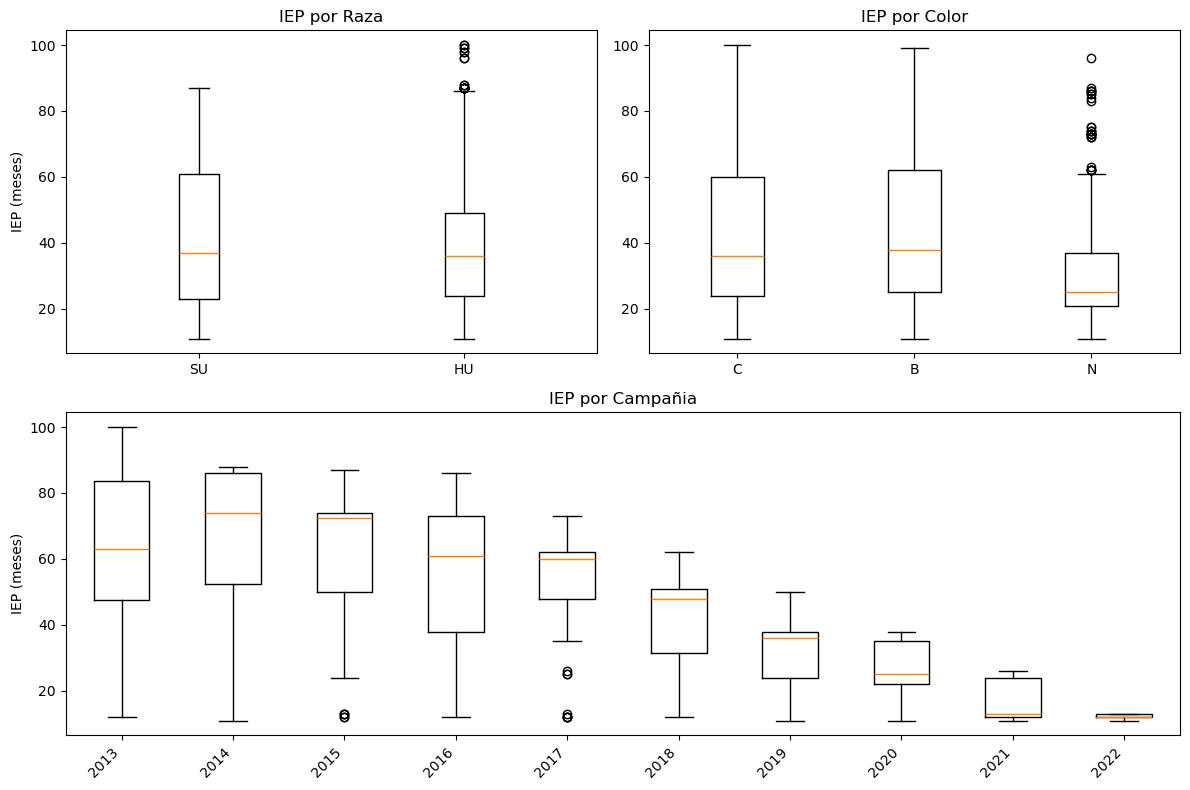

In [68]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig= plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])       
ax2 = fig.add_subplot(gs[0, 1])       
ax3 = fig.add_subplot(gs[1, :], sharey=ax1)  

#Raza--Breed
razas=IEP1['RAZA'].unique()
d_raza=[IEP1[IEP1['RAZA']==r]['IEP'].dropna() for r in razas]

#Color--Color
color=IEP1['COLOR_3'].unique()
d_color=[IEP1[IEP1['COLOR_3']==c]['IEP'].dropna() for c in color]

#Campain--Campaña
E1P['CAMPANIA']=IEP1['CAMPANIA'].astype(str)
camp = sorted(IEP1['CAMPANIA'].unique())
d_camp=[IEP1[IEP1['CAMPANIA']==t]['IEP'].dropna() for t in camp]


# RAZA---Breed
ax1.boxplot(d_raza, labels=razas)
ax1.set_title('IEP por Raza')
ax1.set_ylabel('IEP (meses)')

# COLOR---Color
ax2.boxplot(d_color, labels=color)
ax2.set_title('IEP por Color')

#CAMPAÑA--Campain
ax3.boxplot(d_camp,labels=camp)
ax3.set_title('IEP por Campañia')
ax3.set_ylabel('IEP (meses)')
ax3.set_xticklabels(camp, rotation=45, ha='right') 


plt.tight_layout()
plt.show()

IEP (meses):
Se observa la reducción drástica de los intervalos entre partos a través de los años. Las medianas se sitúan entre los 35-38 meses.
Existe un alto número de valores atípicos con medianas superiores a 60-70 meses.
- Raza: Las medianas se sitúan cerca de los 36-38 meses, con distribuciones de cuartiles similares, lo que refuerza que la raza no es un factor de diferenciación en la velocidad de reaprovechamiento reproductivo.
- Color:Las alpacas de color Negro (N) muestran una mediana significativamente más baja (cerca de los 25 meses) en comparación con las blancas (B) y de colores (C), cuyas medianas superan los 35 meses. Esto sugiere que el grupo negro no solo tiene mejores tasas de preñez y parto, sino que también recupera su capacidad reproductiva más rápido.
- Campaña: A partir de 2017, la mediana cae por debajo de los 60 meses, y para 2021-2022, el IEP se estabiliza en niveles óptimos cercanos a los 12-14 meses.

IEP (months):
A drastic reduction in inter-calving intervals has been observed over the years. Overall medians are situated between 35 and 38 months. However, a high number of outliers exists, particularly with medians exceeding 60–70 months in earlier periods.
- Breed: Medians are positioned near 36–38 months with similar quartile distributions. This reinforces the conclusion that breed is not a differentiating factor in reproductive recovery speed.
- Color: Black (N) alpacas show a significantly lower median (near 25 months) compared to White (B) and Colored (C) alpacas, whose medians exceed 35 months. This suggests that the black group not only achieves better pregnancy and birth rates but also recovers its reproductive capacity faster.
- Campaign: Starting in 2017, the median dropped below 60 months. By the 2021–2022 period, the ICI stabilized at optimal levels near 12–14 months.

In [70]:
from scipy.stats import kruskal

# Kruskal Wallis

#Color
grupos_IEP = [g['IEP'].values for _, g in IEP1.groupby('COLOR_3')]
stat_kw_IEP, p_kw_IEP = kruskal(*grupos_IEP)
print(f"Kruskal-Wallis COLOR_3: H = {stat_kw_IEP:.4f}, p = { p_kw_IEP:.3f}")
if p_kw_IEP < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de COLOR.")
    print("Reject H0: there are significant difference between at least two COLOR groups")

else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de COLOR.")
    print("Fail to reject H0: No significant difference between COLOR groups.")
print('\n')

# Raza --- Breed
grupos_raza_IEP = [g['IEP'].values for _, g in IEP1.groupby('RAZA')]
stat_kw_raza_IEP, p_kw_raza_IEP = kruskal(*grupos_raza_IEP)
print(f"Kruskal-Wallis raza: H = {stat_kw_raza_IEP:.3f}, p = {p_kw_raza_IEP:.4f}")
if p_kw_raza_IEP < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de raza.")
    print("Reject H0: there are significant difference between at least two BREED groups")

else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de raza.")
    print("Fail to reject H0: No significant difference between BREED groups.")
print('\n')


# Campañia --- Campaigns
grupos_camp_IEP = [g['IEP'].values for _, g in IEP1.groupby('CAMPANIA')]
stat_kw_camp_IEP, p_kw_camp_IEP = kruskal(*grupos_camp_IEP)
print(f"Kruskal-Wallis campañia: H = {stat_kw_camp_IEP:.3f}, p = {p_kw_camp_IEP:.4f}")
if p_kw_camp_E1P < 0.05:
    print("Se rechaza H0: hay diferencias significativas entre al menos dos grupos de campañia.")
    print("Reject H0: there are significant difference between at least two CAMPAIGN groups")

else:
    print("No se rechaza H0: no se detectan diferencias significativas entre los grupos de campañia.")
    print("Fail to reject H0: No significance difference between CAMPAIGN groups.")



Kruskal-Wallis COLOR_3: H = 97.5009, p = 0.000
Se rechaza H0: hay diferencias significativas entre al menos dos grupos de COLOR.
Reject H0: there are significant difference between at least two COLOR groups


Kruskal-Wallis raza: H = 4.498, p = 0.0339
Se rechaza H0: hay diferencias significativas entre al menos dos grupos de raza.
Reject H0: there are significant difference between at least two BREED groups


Kruskal-Wallis campañia: H = 817.230, p = 0.0000
Se rechaza H0: hay diferencias significativas entre al menos dos grupos de campañia.
Reject H0: there are significant difference between at least two CAMPAIGN groups


In [71]:
from IPython.display import display, Markdown

texto_conclusion = f"""
### Modelo de Kruskal Wallis  de Intervalo entre partos

* **Raza: Significancia mínima** (p = {p_kw_raza_IEP:.4f}) el valor estadístico (H={stat_kw_raza_IEP:.3f}) es muy bajo. La raza (HU vs SU) no es un factor determinante para el éxito del IEP
* **Color: Es un factor significativo.**  (p < 0.001,H= {stat_kw_IEP:.4f}) Las alpacas negras (N) presentan una mediana significativamente menor (aprox. 25 meses) en comparación con las blancas y de otros colores, cuyas medianas superan los 35 meses. 
* **Campaña: Es el factor más determinante**  (p < 0.001,H={stat_kw_camp_IEP:.3f}) Se observa una transición de un manejo ineficiente con medianas superiores a los 60-70 meses (2013-2014) hacia una estabilización técnica en los 12-14 meses para el periodo 2021-2022.


### Inter-Calving Interval (ICI) Kruskal-Wallis Model:
* **Breed: Minimal significance** (p = {p_kw_raza_IEP:.4f}), the statistical value (H={stat_kw_raza_IEP:.3f}) s very low. Breed (HU vs. SU) is not a decisive factor for ICI success.
* **Color: A significant factor.**  (p < 0.001,H= {stat_kw_IEP:.4f}) Black (N) alpacas exhibit a significantly lower median (approx. 25 months) compared to white and other colored alpacas, whose medians exceed 35 months.
* **Campaign: The most decisive factor** (p < 0.001,H={stat_kw_camp_IEP:.3f}). A transition from inefficient management with medians above 60–70 months (2013–2014) toward technical stabilization at 12–14 months for the 2021–2022 period is observed.
"""

display(Markdown(texto_conclusion))


### Modelo de Kruskal Wallis  de Intervalo entre partos

* **Raza: Significancia mínima** (p = 0.0339) el valor estadístico (H=4.498) es muy bajo. La raza (HU vs SU) no es un factor determinante para el éxito del IEP
* **Color: Es un factor significativo.**  (p < 0.001,H= 97.5009) Las alpacas negras (N) presentan una mediana significativamente menor (aprox. 25 meses) en comparación con las blancas y de otros colores, cuyas medianas superan los 35 meses. 
* **Campaña: Es el factor más determinante**  (p < 0.001,H=817.230) Se observa una transición de un manejo ineficiente con medianas superiores a los 60-70 meses (2013-2014) hacia una estabilización técnica en los 12-14 meses para el periodo 2021-2022.


### Inter-Calving Interval (ICI) Kruskal-Wallis Model:
* **Breed: Minimal significance** (p = 0.0339), the statistical value (H=4.498) s very low. Breed (HU vs. SU) is not a decisive factor for ICI success.
* **Color: A significant factor.**  (p < 0.001,H= 97.5009) Black (N) alpacas exhibit a significantly lower median (approx. 25 months) compared to white and other colored alpacas, whose medians exceed 35 months.
* **Campaign: The most decisive factor** (p < 0.001,H=817.230). A transition from inefficient management with medians above 60–70 months (2013–2014) toward technical stabilization at 12–14 months for the 2021–2022 period is observed.


# Conclusiones | Conclusions


El presente análisis estadístico y de ciencia de datos, aplicado a una población de más de 11,000 registros de la Empresa A, demuestra una transición exitosa de un manejo tradicional hacia un sistema de alta eficiencia técnica.
> *This data science project, based on over 11,000 records from Company A, showcases the structural transformation from traditional husbandry to a high-efficiency technical management system*

**1. Control del Ciclo Reproductivo (E1S, E1P e IEP):**
* Se logró la estandarización de la Edad al Primer Servicio (24-25 meses) y Edad al Primer Parto (36 meses), reduciendo drásticamente la variabilidad mediante decisiones de manejo técnico.
* El Intervalo Entre Partos (IEP) muestra el avance más significativo, reduciéndose de medianas de >60 meses en 2013 a niveles óptimos de 12-14 meses en 2022.
> *1. Management Impact: The Inter-Calving Interval (ICI) was reduced from >60 months to an optimal 12-14 month cycle by 2022, proving the success of standardized technical protocols.*

**2. Determinantes Estadísticos (Rigor Analítico)Efecto Campaña:**
* Las pruebas de Kruskal-Wallis confirman que la gestión anual (Campaña) es el factor más determinante en todos los KPIs ($p < 0.001$), validando que las mejoras son producto del manejo técnico y no del azar.
* Influencia del Fenotipo: Se identificó que las alpacas de color Negro (N) presentan una superioridad estadística en la Tasa de Partos ($p=0.011$) y un IEP significativamente más corto (~25 meses) que los otros grupos cromáticos.
* Neutralidad de la Raza: Se demostró mediante modelos logísticos y no paramétricos que la Raza (Huacaya vs. Suri) no tiene un impacto biológico significativo en la eficiencia reproductiva bajo este sistema de manejo.
> *2. Statistical Rigor: Using Kruskal-Wallis and Logistic Regression, I identified that Campaign and Color are the primary drivers of reproductive success, while Breed remains a neutral factor.*


**3. Diagnóstico de Eficiencia (Brecha de Pérdida):**
* Se detectó una brecha del 18.6% entre la Tasa de Preñez (77.7%) y la Tasa de Partos (59.1%), lo que permite identificar la pérdida gestacional como el punto crítico para futuras intervenciones técnicas y sanitarias.
> *3. Actionable Insights: The 18.6% gap between pregnancy and birth rates provides a clear roadmap for future interventions focusing on gestational health to maximize herd productivity.*